<a href="https://colab.research.google.com/github/YolandaNkalashe25/COS801/blob/main/COS801_FVV_u13193016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COS 801 Assignment Code

# Section 1. Installing packages to be used

In [ ]:
!pip3 install torch torchvision
!pip install keras
!pip install tensorflow
!pip install mnist


In [ ]:
import torch
from torch import nn, optim
import torch.nn.functional as F

import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
import seaborn as sns
from matplotlib import pyplot

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models

In [ ]:
import keras
from keras import layers
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.datasets import cifar100
from keras.datasets import fashion_mnist
from keras.datasets import mnist

# Section 2: Importing Datasets

**MNIST Fashion**

In [ ]:
(MF_train_images, MF_train_labels), (MF_test_images, MF_test_labels) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#Normalizing the data
MF_train_images, MF_test_images = MF_train_images / 255.0, MF_test_images / 255.0

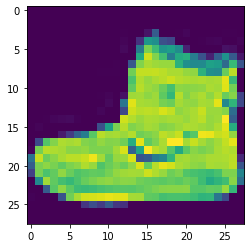

In [ ]:
#visual
pyplot.imshow(MF_train_images[0].reshape((28,28)))

In [ ]:
MF_train_images.shape

(60000, 28, 28)

In [ ]:
MF_train_labels.shape

(60000,)

In [ ]:
MF_test_images.shape

(10000, 28, 28)

In [ ]:
MF_test_labels.shape

(10000,)

In [ ]:
#Reshaping the data
MF_train_images_shaped=MF_train_images.reshape(60000,28*28)
MF_test_images_shaped = MF_test_images.reshape(10000,28*28)

In [ ]:
MF_train_images_shaped.shape

(60000, 784)

In [ ]:
MF_test_images_shaped.shape

(10000, 784)

In [ ]:
MF_train_labels_cat=to_categorical(MF_train_labels)

**MNIST Handwritten Data**

In [ ]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
mnist_train_images, mnist_test_images = mnist_train_images / 255.0, mnist_test_images / 255.0

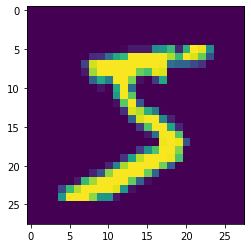

In [ ]:
#visual
pyplot.imshow(mnist_train_images[0].reshape((28,28)))

In [ ]:
mnist_train_images.shape

(60000, 28, 28)

In [ ]:
mnist_train_labels.shape

(60000,)

In [ ]:
mnist_test_labels.shape

(10000,)

In [ ]:
mnist_test_images.shape

(10000, 28, 28)

In [ ]:
#Reshaping the data
mnist_train_images_shape=mnist_train_images.reshape(60000,28*28)
mnist_test_images_shape = mnist_test_images.reshape(10000,28*28)

In [ ]:
mnist_train_labels=to_categorical(mnist_train_labels)

**CIFAR10 Dataset**

In [ ]:
(CF10_train_images, CF10_train_labels), (CF10_test_images, CF10_test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
CF10_train_images, CF10_test_images = CF10_train_images / 255.0, CF10_test_images / 255.0

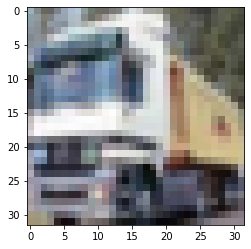

In [ ]:
pyplot.imshow(CF10_train_images[1], cmap=pyplot.cm.binary)

In [ ]:
CF10_train_images.shape

(50000, 32, 32, 3)

In [ ]:
CF10_train_labels.shape

(50000, 1)

In [ ]:
CF10_test_images.shape

(10000, 32, 32, 3)

In [ ]:
CF10_test_labels.shape

(10000, 1)

In [ ]:
CF10_train_images_shape=CF10_train_images.reshape(50000,32*32*3)
CF10_test_images_shape = CF10_test_images.reshape(10000,32*32*3)

In [ ]:
CF10_train_labels_cat=to_categorical(CF10_train_labels)

**CIFAR100 Dataset**

In [ ]:
(CF100_train_images, CF100_train_labels), (CF100_test_images, CF100_test_labels) = datasets.cifar100.load_data()

169009152/169001437 [==============================] - 11s 0us/step


In [ ]:
CF100_train_images, CF100_test_images = CF100_train_images / 255.0, CF100_test_images / 255.0

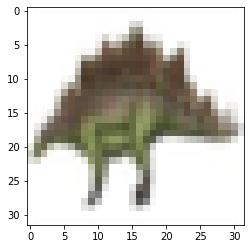

In [ ]:
pyplot.imshow(CF100_train_images[1], cmap=pyplot.cm.binary)

In [ ]:
CF100_train_images.shape

(50000, 32, 32, 3)

In [ ]:
CF100_train_labels.shape

(50000, 1)

In [ ]:
CF100_test_images.shape

(10000, 32, 32, 3)

In [ ]:
CF100_test_labels.shape

(10000, 1)

In [ ]:
CF100_train_images_shape=CF100_train_images.reshape(50000,32*32*3)
CF100_test_images_shape = CF100_test_images.reshape(10000,32*32*3)

In [ ]:
CF100_train_images.shape

(50000, 32, 32, 3)

In [ ]:
CF100_train_labels_cat=to_categorical(CF100_train_labels)

# Section 3: Building the models

## Model 1: Simple NN (No hidden Layers)

In [ ]:
def simpleNN(ndim,out):
  model=Sequential()
  model.add(Dense(out, activation='softmax',kernel_initializer='he_uniform',input_dim=ndim))

  #compiling the model:
  opt = SGD()
  model.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )

  return model


In [ ]:
simple_model_mnist=simpleNN(ndim=784,out=10)
simple_model_cifar=simpleNN(ndim=3072,out=10)

In [ ]:
#Plotting function:

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
  train_metrics=history.history[metric]
  val_metrics=history.history['val_'+metric]
  ephocs= range(1, len(train_metrics)+1)
  pyplot.plot(ephocs, train_metrics)
  pyplot.plot(ephocs, val_metrics)
  pyplot.title('Training and Validation'+ metric)
  pyplot.xlabel("Ephocs")
  pyplot.ylabel(metric)
  pyplot.legend(["train_"+metric, 'val_'+metric])
  pyplot.show()


In [ ]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss',patience=10)

### **Training model on MNIST FASHION**

In [ ]:
#Training model without early stopping:

history_MF= simple_model_mnist.fit(MF_train_images_shaped,to_categorical(MF_train_labels),validation_split=0.20,batch_size=50,verbose=2,epochs=100)

Epoch 1/100
960/960 - 1s - loss: 0.9776 - accuracy: 0.6983 - val_loss: 0.7179 - val_accuracy: 0.7754
Epoch 2/100
960/960 - 1s - loss: 0.6707 - accuracy: 0.7867 - val_loss: 0.6247 - val_accuracy: 0.7925
Epoch 3/100
960/960 - 1s - loss: 0.6048 - accuracy: 0.8057 - val_loss: 0.5825 - val_accuracy: 0.8092
Epoch 4/100
960/960 - 1s - loss: 0.5691 - accuracy: 0.8161 - val_loss: 0.5573 - val_accuracy: 0.8126
Epoch 5/100
960/960 - 1s - loss: 0.5461 - accuracy: 0.8222 - val_loss: 0.5370 - val_accuracy: 0.8221
Epoch 6/100
960/960 - 1s - loss: 0.5294 - accuracy: 0.8277 - val_loss: 0.5301 - val_accuracy: 0.8218
Epoch 7/100
960/960 - 1s - loss: 0.5163 - accuracy: 0.8305 - val_loss: 0.5130 - val_accuracy: 0.8274
Epoch 8/100
960/960 - 1s - loss: 0.5061 - accuracy: 0.8330 - val_loss: 0.5044 - val_accuracy: 0.8298
Epoch 9/100
960/960 - 1s - loss: 0.4977 - accuracy: 0.8351 - val_loss: 0.4994 - val_accuracy: 0.8291
Epoch 10/100
960/960 - 1s - loss: 0.4903 - accuracy: 0.8370 - val_loss: 0.4917 - val_accura

In [ ]:
#Training model to include early stopping with patience of 10

history_MF_es= simple_model_mnist.fit(MF_train_images_shaped,MF_train_labels_cat,validation_split=0.20,batch_size=50,verbose=2,epochs=100,callbacks=[early_stopping])

Epoch 1/100
960/960 - 1s - loss: 0.3929 - accuracy: 0.8656 - val_loss: 0.4172 - val_accuracy: 0.8569
Epoch 2/100
960/960 - 1s - loss: 0.3928 - accuracy: 0.8657 - val_loss: 0.4194 - val_accuracy: 0.8568
Epoch 3/100
960/960 - 1s - loss: 0.3925 - accuracy: 0.8651 - val_loss: 0.4180 - val_accuracy: 0.8563
Epoch 4/100
960/960 - 1s - loss: 0.3920 - accuracy: 0.8657 - val_loss: 0.4215 - val_accuracy: 0.8541
Epoch 5/100
960/960 - 1s - loss: 0.3919 - accuracy: 0.8654 - val_loss: 0.4182 - val_accuracy: 0.8549
Epoch 6/100
960/960 - 1s - loss: 0.3918 - accuracy: 0.8651 - val_loss: 0.4170 - val_accuracy: 0.8574
Epoch 7/100
960/960 - 1s - loss: 0.3915 - accuracy: 0.8659 - val_loss: 0.4164 - val_accuracy: 0.8577
Epoch 8/100
960/960 - 1s - loss: 0.3909 - accuracy: 0.8660 - val_loss: 0.4167 - val_accuracy: 0.8561
Epoch 9/100
960/960 - 1s - loss: 0.3910 - accuracy: 0.8665 - val_loss: 0.4168 - val_accuracy: 0.8566
Epoch 10/100
960/960 - 1s - loss: 0.3907 - accuracy: 0.8654 - val_loss: 0.4159 - val_accura

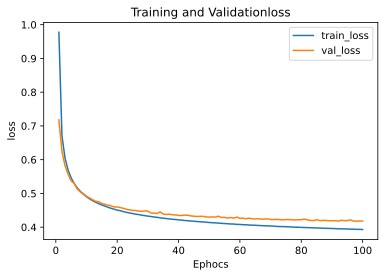

In [ ]:
plot_metric(history_MF,'loss')

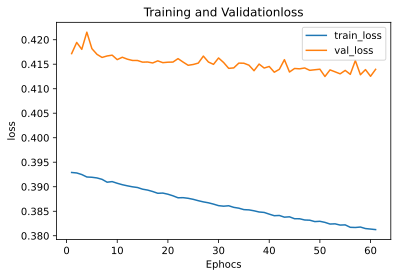

In [ ]:
plot_metric(history_MF_es,'loss')

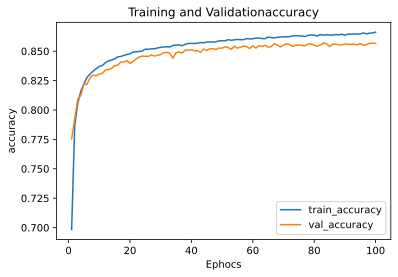

In [ ]:
plot_metric(history_MF,'accuracy')

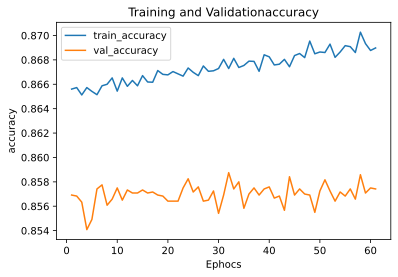

In [ ]:
plot_metric(history_MF_es,'accuracy')

In [ ]:
#Evaluating the model.

_, MF_train_acc = history_MF_es.model.evaluate(MF_train_images_shaped, MF_train_labels_cat, verbose=0)
_, MF_test_acc = history_MF_es.model.evaluate(MF_test_images_shaped, to_categorical(MF_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (MF_train_acc, MF_test_acc))

Train: 0.867, Test: 0.845


In [ ]:
#Using the model to predict:
predictions = simple_model_mnist.predict(MF_test_images_shaped)

In [ ]:
pred_val_array=predictions[0]

In [ ]:
np.argmax(pred_val_array)

In [ ]:
MF_test_labels[0]

In [ ]:
MF_test_labels.shape

In [ ]:
correct="No"
count=0
for i in range(10000):
  pred_val_array=predictions[i]
  Ypred=np.argmax(pred_val_array)
  Y=MF_test_labels[i]

  if Ypred!=Y:
    count +=1

  #if Ypred==Y:
    #correct="Yes"

  #print("Ypred= ",Ypred, "Ytrue= ",Y, "Correctly Classified: ", correct)

In [ ]:
missclassified_predictions=(count/10000)*100
missclassified_predictions

### **Training model on MNIST Digits**

In [ ]:
history_mnist= simple_model_mnist.fit(mnist_train_images_shape,mnist_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500)

Epoch 1/500
960/960 - 1s - loss: 2.8587 - accuracy: 0.3848 - val_loss: 1.2288 - val_accuracy: 0.6432
Epoch 2/500
960/960 - 1s - loss: 0.9499 - accuracy: 0.7125 - val_loss: 0.7205 - val_accuracy: 0.7803
Epoch 3/500
960/960 - 1s - loss: 0.6765 - accuracy: 0.7930 - val_loss: 0.5753 - val_accuracy: 0.8276
Epoch 4/500
960/960 - 1s - loss: 0.5734 - accuracy: 0.8251 - val_loss: 0.5072 - val_accuracy: 0.8487
Epoch 5/500
960/960 - 1s - loss: 0.5174 - accuracy: 0.8440 - val_loss: 0.4660 - val_accuracy: 0.8622
Epoch 6/500
960/960 - 1s - loss: 0.4811 - accuracy: 0.8561 - val_loss: 0.4385 - val_accuracy: 0.8723
Epoch 7/500
960/960 - 1s - loss: 0.4555 - accuracy: 0.8648 - val_loss: 0.4182 - val_accuracy: 0.8790
Epoch 8/500
960/960 - 1s - loss: 0.4362 - accuracy: 0.8717 - val_loss: 0.4035 - val_accuracy: 0.8845
Epoch 9/500
960/960 - 1s - loss: 0.4212 - accuracy: 0.8766 - val_loss: 0.3911 - val_accuracy: 0.8891
Epoch 10/500
960/960 - 1s - loss: 0.4088 - accuracy: 0.8805 - val_loss: 0.3812 - val_accura

In [ ]:
history_mnist_es= simple_model_mnist.fit(mnist_train_images_shape,mnist_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500,callbacks=[early_stopping])

Epoch 1/500
960/960 - 1s - loss: 0.2430 - accuracy: 0.9324 - val_loss: 0.2684 - val_accuracy: 0.9275
Epoch 2/500
960/960 - 1s - loss: 0.2430 - accuracy: 0.9323 - val_loss: 0.2680 - val_accuracy: 0.9282
Epoch 3/500
960/960 - 1s - loss: 0.2429 - accuracy: 0.9326 - val_loss: 0.2683 - val_accuracy: 0.9282
Epoch 4/500
960/960 - 1s - loss: 0.2429 - accuracy: 0.9327 - val_loss: 0.2683 - val_accuracy: 0.9276
Epoch 5/500
960/960 - 1s - loss: 0.2429 - accuracy: 0.9327 - val_loss: 0.2682 - val_accuracy: 0.9282
Epoch 6/500
960/960 - 1s - loss: 0.2428 - accuracy: 0.9326 - val_loss: 0.2686 - val_accuracy: 0.9277
Epoch 7/500
960/960 - 1s - loss: 0.2428 - accuracy: 0.9329 - val_loss: 0.2683 - val_accuracy: 0.9285
Epoch 8/500
960/960 - 1s - loss: 0.2428 - accuracy: 0.9327 - val_loss: 0.2681 - val_accuracy: 0.9285
Epoch 9/500
960/960 - 1s - loss: 0.2428 - accuracy: 0.9327 - val_loss: 0.2682 - val_accuracy: 0.9283
Epoch 10/500
960/960 - 1s - loss: 0.2427 - accuracy: 0.9326 - val_loss: 0.2682 - val_accura

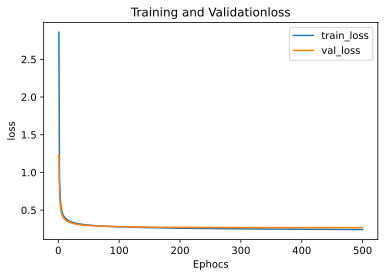

In [ ]:
plot_metric(history_mnist,'loss')

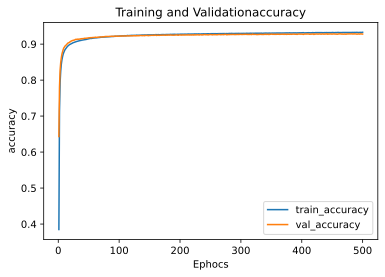

In [ ]:
plot_metric(history_mnist,'accuracy')

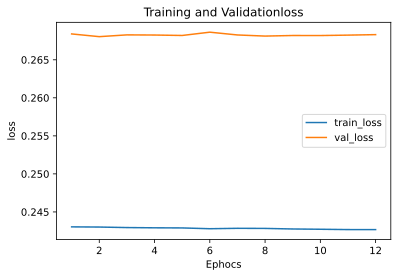

In [ ]:
plot_metric(history_mnist_es,'loss')

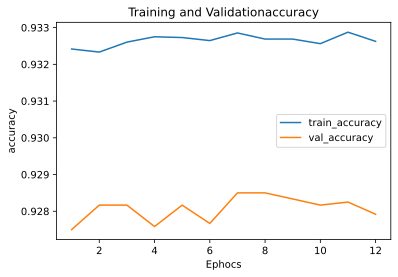

In [ ]:
plot_metric(history_mnist_es,'accuracy')

In [ ]:
_, mnist_train_acc = simple_model_mnist.evaluate(mnist_train_images_shape, mnist_train_labels, verbose=0)
_, mnist_test_acc = simple_model_mnist.evaluate(mnist_test_images_shape, to_categorical(mnist_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (mnist_train_acc, mnist_test_acc))

Train: 0.932, Test: 0.926


### **Training Model with CIFAR10 Dataset**

In [ ]:
history_CF10= simple_model_cifar.fit(CF10_train_images_shape,to_categorical(CF10_train_labels),validation_split=0.20,batch_size=50,verbose=2,epochs=500)

Epoch 1/500
800/800 - 2s - loss: 1.9750 - accuracy: 0.2921 - val_loss: 1.8776 - val_accuracy: 0.3394
Epoch 2/500
800/800 - 2s - loss: 1.8510 - accuracy: 0.3482 - val_loss: 1.8568 - val_accuracy: 0.3423
Epoch 3/500
800/800 - 2s - loss: 1.8168 - accuracy: 0.3611 - val_loss: 1.8158 - val_accuracy: 0.3687
Epoch 4/500
800/800 - 2s - loss: 1.7971 - accuracy: 0.3737 - val_loss: 1.8058 - val_accuracy: 0.3722
Epoch 5/500
800/800 - 2s - loss: 1.7803 - accuracy: 0.3806 - val_loss: 1.8097 - val_accuracy: 0.3677
Epoch 6/500
800/800 - 2s - loss: 1.7719 - accuracy: 0.3837 - val_loss: 1.8195 - val_accuracy: 0.3654
Epoch 7/500
800/800 - 2s - loss: 1.7625 - accuracy: 0.3888 - val_loss: 1.7886 - val_accuracy: 0.3781
Epoch 8/500
800/800 - 2s - loss: 1.7525 - accuracy: 0.3915 - val_loss: 1.8300 - val_accuracy: 0.3558
Epoch 9/500
800/800 - 2s - loss: 1.7477 - accuracy: 0.3923 - val_loss: 1.8435 - val_accuracy: 0.3511
Epoch 10/500
800/800 - 2s - loss: 1.7410 - accuracy: 0.3958 - val_loss: 1.7954 - val_accura

In [ ]:
history_CF_es= simple_model_cifar.fit(CF10_train_images_shape,to_categorical(CF10_train_labels),validation_split=0.20,batch_size=50,verbose=2,epochs=500,callbacks=[early_stopping])

Epoch 1/500
800/800 - 2s - loss: 1.5691 - accuracy: 0.4622 - val_loss: 1.8231 - val_accuracy: 0.3818
Epoch 2/500
800/800 - 2s - loss: 1.5643 - accuracy: 0.4652 - val_loss: 1.8448 - val_accuracy: 0.3777
Epoch 3/500
800/800 - 2s - loss: 1.5691 - accuracy: 0.4656 - val_loss: 1.8265 - val_accuracy: 0.3829
Epoch 4/500
800/800 - 2s - loss: 1.5668 - accuracy: 0.4651 - val_loss: 1.8175 - val_accuracy: 0.3836
Epoch 5/500
800/800 - 2s - loss: 1.5669 - accuracy: 0.4653 - val_loss: 1.8108 - val_accuracy: 0.3855
Epoch 6/500
800/800 - 2s - loss: 1.5656 - accuracy: 0.4642 - val_loss: 1.8378 - val_accuracy: 0.3765
Epoch 7/500
800/800 - 2s - loss: 1.5646 - accuracy: 0.4645 - val_loss: 1.8192 - val_accuracy: 0.3847
Epoch 8/500
800/800 - 2s - loss: 1.5671 - accuracy: 0.4645 - val_loss: 1.8590 - val_accuracy: 0.3710
Epoch 9/500
800/800 - 2s - loss: 1.5650 - accuracy: 0.4646 - val_loss: 1.8203 - val_accuracy: 0.3852
Epoch 10/500
800/800 - 2s - loss: 1.5655 - accuracy: 0.4649 - val_loss: 1.8585 - val_accura

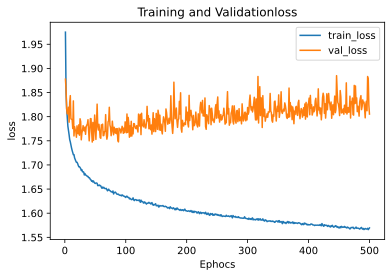

In [ ]:
plot_metric(history_CF10,'loss')

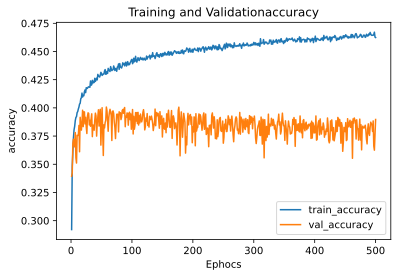

In [ ]:
plot_metric(history_CF10,'accuracy')

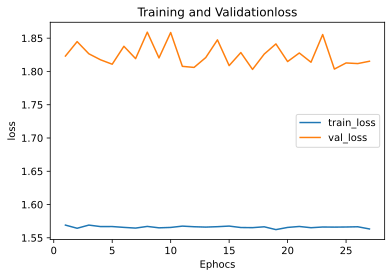

In [ ]:
plot_metric(history_CF_es,'loss')

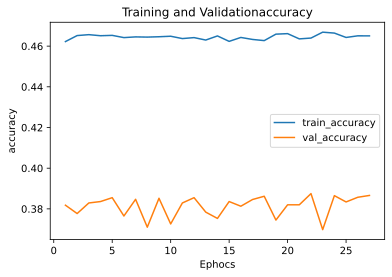

In [ ]:
plot_metric(history_CF_es,'accuracy')

In [ ]:
_, CF10_train_acc = simple_model_cifar.evaluate(CF10_train_images_shape, to_categorical(CF10_train_labels), verbose=0)
_, CF10_test_acc = simple_model_cifar.evaluate(CF10_test_images_shape, to_categorical(CF10_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (CF10_train_acc, CF10_test_acc))

Train: 0.460, Test: 0.386


### Training Model on CIFAR100 data

In [ ]:
history_CF100= simpleNN(ndim=3072,out=100).fit(CF100_train_images_shape,CF100_train_labels_cat,validation_split=0.20,batch_size=50,verbose=2,epochs=1000)

Epoch 1/1000
800/800 - 3s - loss: 4.3406 - accuracy: 0.0549 - val_loss: 4.1387 - val_accuracy: 0.0796
Epoch 2/1000
800/800 - 3s - loss: 4.0419 - accuracy: 0.1007 - val_loss: 4.0006 - val_accuracy: 0.1038
Epoch 3/1000
800/800 - 3s - loss: 3.9245 - accuracy: 0.1222 - val_loss: 3.9136 - val_accuracy: 0.1251
Epoch 4/1000
800/800 - 3s - loss: 3.8522 - accuracy: 0.1375 - val_loss: 3.8795 - val_accuracy: 0.1355
Epoch 5/1000
800/800 - 3s - loss: 3.8023 - accuracy: 0.1475 - val_loss: 3.8415 - val_accuracy: 0.1409
Epoch 6/1000
800/800 - 3s - loss: 3.7629 - accuracy: 0.1533 - val_loss: 3.8168 - val_accuracy: 0.1474
Epoch 7/1000
800/800 - 3s - loss: 3.7308 - accuracy: 0.1602 - val_loss: 3.7945 - val_accuracy: 0.1507
Epoch 8/1000
800/800 - 3s - loss: 3.7060 - accuracy: 0.1678 - val_loss: 3.7850 - val_accuracy: 0.1473
Epoch 9/1000
800/800 - 3s - loss: 3.6823 - accuracy: 0.1710 - val_loss: 3.7761 - val_accuracy: 0.1523
Epoch 10/1000
800/800 - 3s - loss: 3.6620 - accuracy: 0.1758 - val_loss: 3.7614 - 

In [ ]:
history_CF100_es= simpleNN(ndim=3072,out=100).fit(CF100_train_images_shape,CF100_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500,callbacks=[early_stopping])

Epoch 1/500
800/800 - 4s - loss: 4.3334 - accuracy: 0.0563 - val_loss: 4.1463 - val_accuracy: 0.0837
Epoch 2/500
800/800 - 3s - loss: 4.0376 - accuracy: 0.1016 - val_loss: 3.9870 - val_accuracy: 0.1134
Epoch 3/500
800/800 - 3s - loss: 3.9216 - accuracy: 0.1223 - val_loss: 3.9122 - val_accuracy: 0.1260
Epoch 4/500
800/800 - 3s - loss: 3.8513 - accuracy: 0.1365 - val_loss: 3.8748 - val_accuracy: 0.1345
Epoch 5/500
800/800 - 3s - loss: 3.8009 - accuracy: 0.1466 - val_loss: 3.8398 - val_accuracy: 0.1422
Epoch 6/500
800/800 - 3s - loss: 3.7613 - accuracy: 0.1549 - val_loss: 3.8158 - val_accuracy: 0.1461
Epoch 7/500
800/800 - 3s - loss: 3.7306 - accuracy: 0.1603 - val_loss: 3.7961 - val_accuracy: 0.1528
Epoch 8/500
800/800 - 3s - loss: 3.7043 - accuracy: 0.1662 - val_loss: 3.7774 - val_accuracy: 0.1560
Epoch 9/500
800/800 - 3s - loss: 3.6814 - accuracy: 0.1719 - val_loss: 3.7738 - val_accuracy: 0.1476
Epoch 10/500
800/800 - 3s - loss: 3.6607 - accuracy: 0.1735 - val_loss: 3.7625 - val_accura

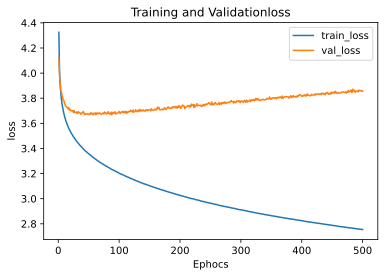

In [ ]:
plot_metric(history_CF100,'loss')

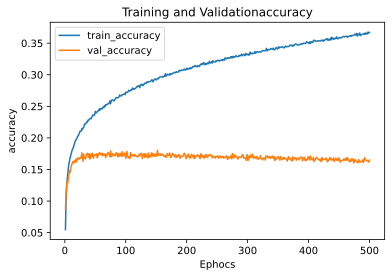

In [ ]:
plot_metric(history_CF100,'accuracy')

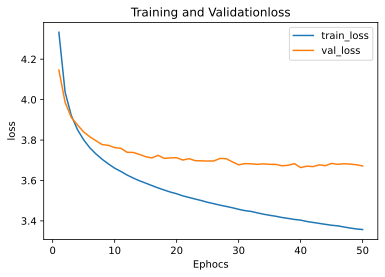

In [ ]:
plot_metric(history_CF100_es,'loss')

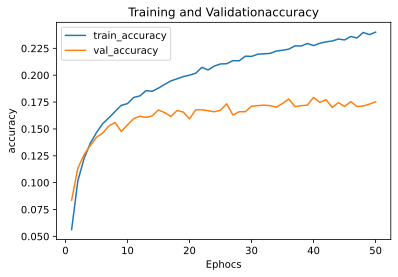

In [ ]:
plot_metric(history_CF100_es,'accuracy')

In [ ]:
_, CF100_train_acc = simpleNN(ndim=3072,out=100).evaluate(CF100_train_images_shape, CF100_train_labels, verbose=0)
_, CF100_test_acc = simpleNN(ndim=3072,out=100).evaluate(CF100_test_images_shape, to_categorical(CF100_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (CF100_train_acc, CF100_test_acc))

Train: 0.011, Test: 0.007


## Model2 : MLP

In [ ]:
def model2_MLP(ndim,out):

  model = Sequential()
  model.add(Dense(200, activation='relu',kernel_initializer='he_uniform',input_dim=ndim))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(25, activation='relu'))
  model.add(Dense(out, activation='softmax'))
  
  opt = SGD()
  model.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )

  return model


### Training Model on MNIST Fashion

In [ ]:
#Training without ES

history_MF_model2=model2_MLP(ndim=784,out=10).fit(MF_train_images_shaped,MF_train_labels_cat,validation_split=0.20,batch_size=50,verbose=2,epochs=500)

Epoch 1/500
960/960 - 3s - loss: 1.0135 - accuracy: 0.6595 - val_loss: 0.6077 - val_accuracy: 0.7913
Epoch 2/500
960/960 - 3s - loss: 0.5672 - accuracy: 0.8021 - val_loss: 0.5177 - val_accuracy: 0.8170
Epoch 3/500
960/960 - 3s - loss: 0.4946 - accuracy: 0.8267 - val_loss: 0.4926 - val_accuracy: 0.8302
Epoch 4/500
960/960 - 2s - loss: 0.4560 - accuracy: 0.8407 - val_loss: 0.4720 - val_accuracy: 0.8337
Epoch 5/500
960/960 - 2s - loss: 0.4310 - accuracy: 0.8502 - val_loss: 0.4262 - val_accuracy: 0.8515
Epoch 6/500
960/960 - 2s - loss: 0.4090 - accuracy: 0.8576 - val_loss: 0.4121 - val_accuracy: 0.8577
Epoch 7/500
960/960 - 2s - loss: 0.3907 - accuracy: 0.8629 - val_loss: 0.4045 - val_accuracy: 0.8603
Epoch 8/500
960/960 - 2s - loss: 0.3764 - accuracy: 0.8661 - val_loss: 0.4117 - val_accuracy: 0.8553
Epoch 9/500
960/960 - 2s - loss: 0.3641 - accuracy: 0.8706 - val_loss: 0.3871 - val_accuracy: 0.8652
Epoch 10/500
960/960 - 2s - loss: 0.3532 - accuracy: 0.8741 - val_loss: 0.3911 - val_accura

In [ ]:
#With Early Stopping

history_MF_model2_es=model2_MLP(ndim=784,out=10).fit(MF_train_images_shaped,MF_train_labels_cat,validation_split=0.20,batch_size=50,verbose=2,epochs=500, callbacks=[early_stopping])

Epoch 1/500
960/960 - 3s - loss: 0.9566 - accuracy: 0.6810 - val_loss: 0.6087 - val_accuracy: 0.7923
Epoch 2/500
960/960 - 2s - loss: 0.5407 - accuracy: 0.8117 - val_loss: 0.5114 - val_accuracy: 0.8210
Epoch 3/500
960/960 - 2s - loss: 0.4784 - accuracy: 0.8320 - val_loss: 0.4612 - val_accuracy: 0.8382
Epoch 4/500
960/960 - 2s - loss: 0.4433 - accuracy: 0.8446 - val_loss: 0.4427 - val_accuracy: 0.8491
Epoch 5/500
960/960 - 2s - loss: 0.4200 - accuracy: 0.8520 - val_loss: 0.4590 - val_accuracy: 0.8422
Epoch 6/500
960/960 - 2s - loss: 0.4012 - accuracy: 0.8592 - val_loss: 0.4048 - val_accuracy: 0.8595
Epoch 7/500
960/960 - 2s - loss: 0.3841 - accuracy: 0.8639 - val_loss: 0.3925 - val_accuracy: 0.8643
Epoch 8/500
960/960 - 2s - loss: 0.3716 - accuracy: 0.8676 - val_loss: 0.3940 - val_accuracy: 0.8604
Epoch 9/500
960/960 - 2s - loss: 0.3583 - accuracy: 0.8723 - val_loss: 0.3857 - val_accuracy: 0.8634
Epoch 10/500
960/960 - 2s - loss: 0.3480 - accuracy: 0.8756 - val_loss: 0.3759 - val_accura

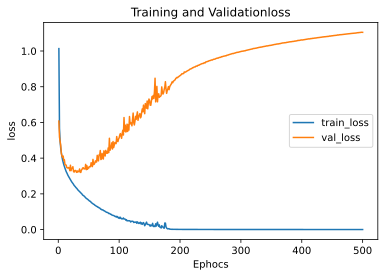

In [ ]:
plot_metric(history_MF_model2,'loss')

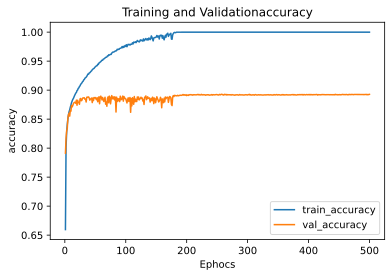

In [ ]:
plot_metric(history_MF_model2,'accuracy')

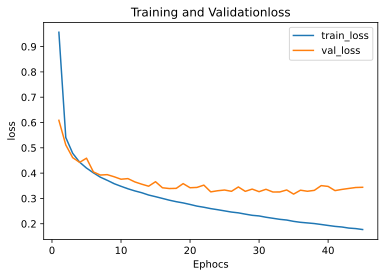

In [ ]:
plot_metric(history_MF_model2_es,'loss')

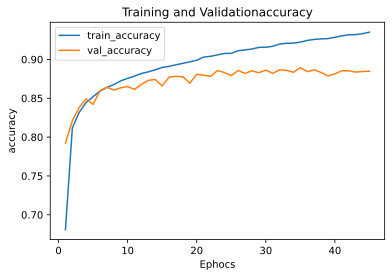

In [ ]:
plot_metric(history_MF_model2_es,'accuracy')

In [ ]:
#Evaluating model
_, MF_train_acc_model2 = history_MF_model2_es.model.evaluate(MF_train_images_shaped, MF_train_labels_cat, verbose=0)
_, MF_test_acc_model2 = history_MF_model2_es.model.evaluate(MF_test_images_shaped, to_categorical(MF_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (MF_train_acc_model2, MF_test_acc_model2))

Train: 0.927, Test: 0.879


### Training Model on MNIST Handwriting

In [ ]:
#Training without ES

history_mnist_model2=model2_MLP(ndim=784,out=10).fit(mnist_train_images_shape,mnist_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500)

Epoch 1/500
960/960 - 3s - loss: 1.0335 - accuracy: 0.6873 - val_loss: 0.4248 - val_accuracy: 0.8745
Epoch 2/500
960/960 - 2s - loss: 0.3691 - accuracy: 0.8913 - val_loss: 0.2798 - val_accuracy: 0.9190
Epoch 3/500
960/960 - 2s - loss: 0.2724 - accuracy: 0.9204 - val_loss: 0.2268 - val_accuracy: 0.9352
Epoch 4/500
960/960 - 2s - loss: 0.2220 - accuracy: 0.9353 - val_loss: 0.1928 - val_accuracy: 0.9442
Epoch 5/500
960/960 - 2s - loss: 0.1872 - accuracy: 0.9458 - val_loss: 0.1770 - val_accuracy: 0.9484
Epoch 6/500
960/960 - 2s - loss: 0.1636 - accuracy: 0.9518 - val_loss: 0.1579 - val_accuracy: 0.9539
Epoch 7/500
960/960 - 3s - loss: 0.1440 - accuracy: 0.9579 - val_loss: 0.1487 - val_accuracy: 0.9569
Epoch 8/500
960/960 - 2s - loss: 0.1294 - accuracy: 0.9620 - val_loss: 0.1353 - val_accuracy: 0.9607
Epoch 9/500
960/960 - 3s - loss: 0.1166 - accuracy: 0.9660 - val_loss: 0.1308 - val_accuracy: 0.9611
Epoch 10/500
960/960 - 2s - loss: 0.1064 - accuracy: 0.9690 - val_loss: 0.1278 - val_accura

In [ ]:
#With Early Stopping

history_mnist_model2_es=model2_MLP(ndim=784,out=10).fit(mnist_train_images_shape,mnist_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500, callbacks=[early_stopping])

Epoch 1/500
960/960 - 3s - loss: 1.1265 - accuracy: 0.6479 - val_loss: 0.4740 - val_accuracy: 0.8570
Epoch 2/500
960/960 - 3s - loss: 0.3751 - accuracy: 0.8907 - val_loss: 0.3013 - val_accuracy: 0.9107
Epoch 3/500
960/960 - 3s - loss: 0.2840 - accuracy: 0.9174 - val_loss: 0.2552 - val_accuracy: 0.9258
Epoch 4/500
960/960 - 3s - loss: 0.2340 - accuracy: 0.9324 - val_loss: 0.2066 - val_accuracy: 0.9408
Epoch 5/500
960/960 - 3s - loss: 0.1994 - accuracy: 0.9422 - val_loss: 0.1878 - val_accuracy: 0.9450
Epoch 6/500
960/960 - 3s - loss: 0.1736 - accuracy: 0.9488 - val_loss: 0.1664 - val_accuracy: 0.9536
Epoch 7/500
960/960 - 2s - loss: 0.1551 - accuracy: 0.9537 - val_loss: 0.1562 - val_accuracy: 0.9558
Epoch 8/500
960/960 - 2s - loss: 0.1393 - accuracy: 0.9588 - val_loss: 0.1585 - val_accuracy: 0.9553
Epoch 9/500
960/960 - 2s - loss: 0.1271 - accuracy: 0.9622 - val_loss: 0.1513 - val_accuracy: 0.9580
Epoch 10/500
960/960 - 3s - loss: 0.1151 - accuracy: 0.9659 - val_loss: 0.1313 - val_accura

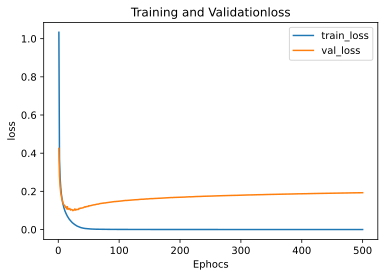

In [ ]:
plot_metric(history_mnist_model2,'loss')

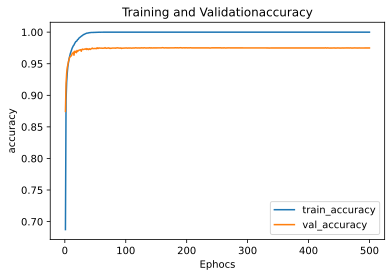

In [ ]:
plot_metric(history_mnist_model2,'accuracy')

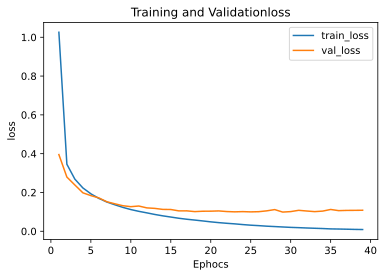

In [ ]:
plot_metric(history_mnist_model2_es,'loss')

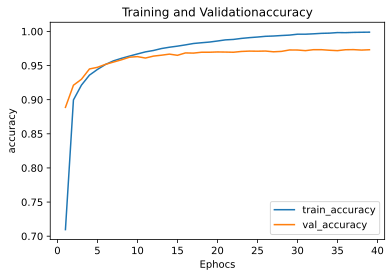

In [ ]:
plot_metric(history_mnist_model2_es,'accuracy')

In [ ]:
#Evaluating model
_, mnist_train_acc_model2 = history_mnist_model2_es.model.evaluate(mnist_train_images_shape, mnist_train_labels, verbose=0)
_, mnist_test_acc_model2 = history_mnist_model2_es.model.evaluate(mnist_test_images_shape, to_categorical(mnist_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (mnist_train_acc_model2, mnist_test_acc_model2))

Train: 0.993, Test: 0.974


### Training model on CIFAR10

In [ ]:
#Training without ES

history_CF10_model2=model2_MLP(ndim=3072,out=10).fit(CF10_train_images_shape,CF10_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=1500)

Epoch 1/1500
800/800 - 5s - loss: 2.0059 - accuracy: 0.2712 - val_loss: 1.8626 - val_accuracy: 0.3326
Epoch 2/1500
800/800 - 5s - loss: 1.7971 - accuracy: 0.3567 - val_loss: 1.7664 - val_accuracy: 0.3682
Epoch 3/1500
800/800 - 5s - loss: 1.7173 - accuracy: 0.3871 - val_loss: 1.7105 - val_accuracy: 0.3914
Epoch 4/1500
800/800 - 5s - loss: 1.6631 - accuracy: 0.4065 - val_loss: 1.6414 - val_accuracy: 0.4152
Epoch 5/1500
800/800 - 5s - loss: 1.6159 - accuracy: 0.4275 - val_loss: 1.6292 - val_accuracy: 0.4233
Epoch 6/1500
800/800 - 5s - loss: 1.5798 - accuracy: 0.4378 - val_loss: 1.6108 - val_accuracy: 0.4289
Epoch 7/1500
800/800 - 5s - loss: 1.5475 - accuracy: 0.4489 - val_loss: 1.6339 - val_accuracy: 0.4190
Epoch 8/1500
800/800 - 5s - loss: 1.5181 - accuracy: 0.4582 - val_loss: 1.5559 - val_accuracy: 0.4470
Epoch 9/1500
800/800 - 5s - loss: 1.4890 - accuracy: 0.4701 - val_loss: 1.5401 - val_accuracy: 0.4539
Epoch 10/1500
800/800 - 5s - loss: 1.4687 - accuracy: 0.4745 - val_loss: 1.5056 - 

In [ ]:
#With Early Stopping

history_CF10_model2_es=model2_MLP(ndim=3072,out=10).fit(CF10_train_images_shape,CF10_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=1500, callbacks=[early_stopping])

Epoch 1/1500
800/800 - 6s - loss: 2.0369 - accuracy: 0.2530 - val_loss: 1.8955 - val_accuracy: 0.3100
Epoch 2/1500
800/800 - 5s - loss: 1.8279 - accuracy: 0.3438 - val_loss: 1.8658 - val_accuracy: 0.3320
Epoch 3/1500
800/800 - 5s - loss: 1.7367 - accuracy: 0.3755 - val_loss: 1.7371 - val_accuracy: 0.3751
Epoch 4/1500
800/800 - 5s - loss: 1.6734 - accuracy: 0.4002 - val_loss: 1.6910 - val_accuracy: 0.3915
Epoch 5/1500
800/800 - 5s - loss: 1.6280 - accuracy: 0.4187 - val_loss: 1.6760 - val_accuracy: 0.4045
Epoch 6/1500
800/800 - 5s - loss: 1.5903 - accuracy: 0.4317 - val_loss: 1.6407 - val_accuracy: 0.4177
Epoch 7/1500
800/800 - 5s - loss: 1.5553 - accuracy: 0.4434 - val_loss: 1.6333 - val_accuracy: 0.4252
Epoch 8/1500
800/800 - 5s - loss: 1.5313 - accuracy: 0.4547 - val_loss: 1.5551 - val_accuracy: 0.4515
Epoch 9/1500
800/800 - 5s - loss: 1.5010 - accuracy: 0.4645 - val_loss: 1.5608 - val_accuracy: 0.4446
Epoch 10/1500
800/800 - 5s - loss: 1.4788 - accuracy: 0.4728 - val_loss: 1.5457 - 

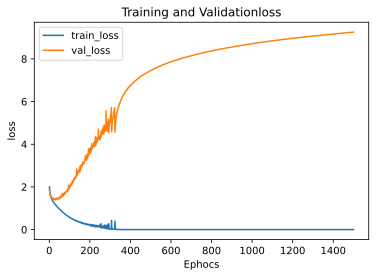

In [ ]:
plot_metric(history_CF10_model2,'loss')

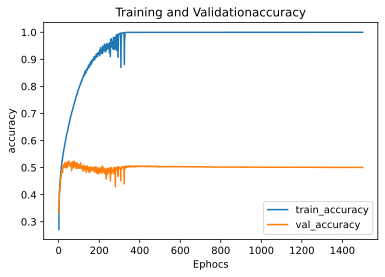

In [ ]:
plot_metric(history_CF10_model2,'accuracy')

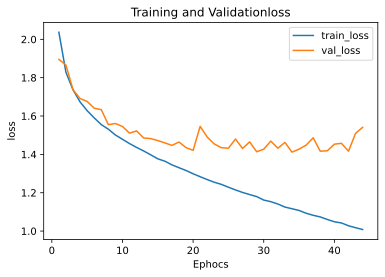

In [ ]:
plot_metric(history_CF10_model2_es,'loss')

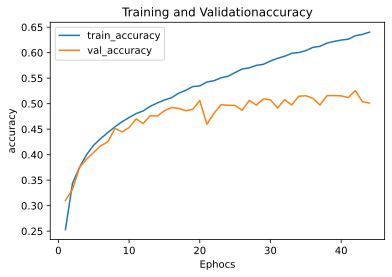

In [ ]:
plot_metric(history_CF10_model2_es,'accuracy')

In [ ]:
#Evaluating model
_, CF10_train_acc_model2 = history_CF10_model2_es.model.evaluate(CF10_train_images_shape, CF10_train_labels, verbose=0)
_, CF10_test_acc_model2 = history_CF10_model2_es.model.evaluate(CF10_test_images_shape, to_categorical(CF10_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (CF10_train_acc_model2, CF10_test_acc_model2))

Train: 0.602, Test: 0.501


### Train model on CF100 data

In [ ]:
#Training without ES

history_CF100_model2=model2_MLP(ndim=3072,out=100).fit(CF100_train_images_shape,CF100_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=1500)

Epoch 1/1500
800/800 - 5s - loss: 4.5867 - accuracy: 0.0132 - val_loss: 4.5645 - val_accuracy: 0.0158
Epoch 2/1500
800/800 - 5s - loss: 4.5226 - accuracy: 0.0283 - val_loss: 4.4738 - val_accuracy: 0.0367
Epoch 3/1500
800/800 - 5s - loss: 4.3904 - accuracy: 0.0413 - val_loss: 4.3240 - val_accuracy: 0.0465
Epoch 4/1500
800/800 - 5s - loss: 4.2225 - accuracy: 0.0543 - val_loss: 4.1560 - val_accuracy: 0.0660
Epoch 5/1500
800/800 - 6s - loss: 4.0788 - accuracy: 0.0751 - val_loss: 4.0353 - val_accuracy: 0.0828
Epoch 6/1500
800/800 - 6s - loss: 3.9821 - accuracy: 0.0884 - val_loss: 3.9559 - val_accuracy: 0.0934
Epoch 7/1500
800/800 - 5s - loss: 3.9088 - accuracy: 0.1000 - val_loss: 3.9005 - val_accuracy: 0.1035
Epoch 8/1500
800/800 - 5s - loss: 3.8552 - accuracy: 0.1077 - val_loss: 3.8459 - val_accuracy: 0.1067
Epoch 9/1500
800/800 - 5s - loss: 3.8079 - accuracy: 0.1164 - val_loss: 3.8064 - val_accuracy: 0.1214
Epoch 10/1500
800/800 - 5s - loss: 3.7644 - accuracy: 0.1248 - val_loss: 3.7825 - 

In [ ]:
#With Early Stopping

history_CF100_model2_es=model2_MLP(ndim=3072,out=100).fit(CF100_train_images_shape,CF100_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=1500, callbacks=[early_stopping])

Epoch 1/1500
800/800 - 5s - loss: 4.5828 - accuracy: 0.0159 - val_loss: 4.5562 - val_accuracy: 0.0241
Epoch 2/1500
800/800 - 5s - loss: 4.4876 - accuracy: 0.0265 - val_loss: 4.4150 - val_accuracy: 0.0281
Epoch 3/1500
800/800 - 5s - loss: 4.3076 - accuracy: 0.0428 - val_loss: 4.2295 - val_accuracy: 0.0533
Epoch 4/1500
800/800 - 5s - loss: 4.1426 - accuracy: 0.0627 - val_loss: 4.1004 - val_accuracy: 0.0657
Epoch 5/1500
800/800 - 5s - loss: 4.0450 - accuracy: 0.0741 - val_loss: 4.0397 - val_accuracy: 0.0773
Epoch 6/1500
800/800 - 5s - loss: 3.9726 - accuracy: 0.0856 - val_loss: 3.9802 - val_accuracy: 0.0867
Epoch 7/1500
800/800 - 5s - loss: 3.9127 - accuracy: 0.0964 - val_loss: 3.9191 - val_accuracy: 0.1037
Epoch 8/1500
800/800 - 5s - loss: 3.8592 - accuracy: 0.1057 - val_loss: 3.8620 - val_accuracy: 0.1067
Epoch 9/1500
800/800 - 5s - loss: 3.8115 - accuracy: 0.1145 - val_loss: 3.8498 - val_accuracy: 0.1109
Epoch 10/1500
800/800 - 5s - loss: 3.7689 - accuracy: 0.1222 - val_loss: 3.7778 - 

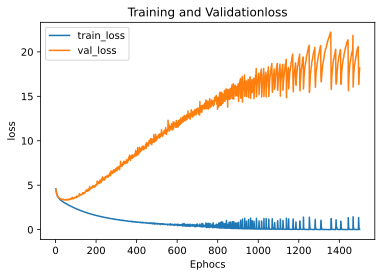

In [ ]:
plot_metric(history_CF100_model2,'loss')

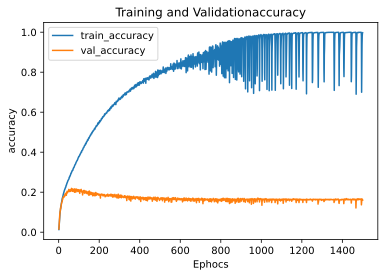

In [ ]:
plot_metric(history_CF100_model2,'accuracy')

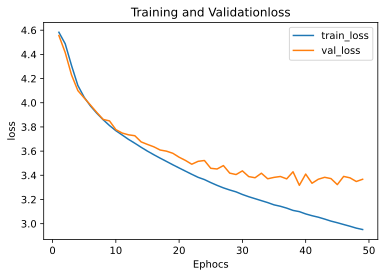

In [ ]:
plot_metric(history_CF100_model2_es,'loss')

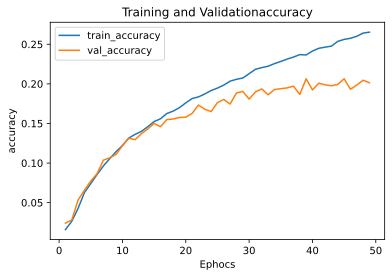

In [ ]:
plot_metric(history_CF100_model2_es,'accuracy')

In [ ]:
#Evaluating model
_, CF100_train_acc_model2 = history_CF100_model2_es.model.evaluate(CF100_train_images_shape, CF100_train_labels, verbose=0)
_, CF100_test_acc_model2 = history_CF100_model2_es.model.evaluate(CF100_test_images_shape, to_categorical(CF100_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (CF100_train_acc_model2, CF100_test_acc_model2))

Train: 0.257, Test: 0.205


## Model 3: Auto Encoder

In [ ]:
def encoder(ndim):
  encoding_dim = 392
  input_img = keras.Input(shape=(ndim,))
  encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
  decoded = layers.Dense(ndim, activation='sigmoid')(encoded)
  
  autoencoder = keras.Model(input_img, decoded)

  opt = SGD()
  autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
  
  encoder = keras.Model(input_img, encoded)
  encoded_input = keras.Input(shape=(encoding_dim,))
  
  # Retrieve the last layer of the autoencoder model
  decoder_layer = autoencoder.layers[-1]
  # Create the decoder model
  decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

  return autoencoder,encoder,decoder


### Pretrained model

In [ ]:
def Dimension_reduction(Xtrain,Xtest,encoder):

  x_train_transformed = encoder.predict(Xtrain)
  x_test_transformed = encoder.predict(Xtest)

  return x_train_transformed, x_test_transformed

In [ ]:
def pretrained_model(x_train_transformed,out):
  model_ae = Sequential()
  model_ae.add(Dense(200, activation='relu',input_shape=x_train_transformed.shape[1:]))
  model_ae.add(Dense(100, activation='relu'))
  model_ae.add(Dense(50, activation='relu'))
  model_ae.add(Dense(25, activation='relu'))
  model_ae.add(Dense(out, activation='softmax'))
  
  opt = SGD()
  model_ae.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  
  return model_ae

In [ ]:
#Visual of Decoded and original data
def encoder_plot_mnist(X,encoder,decoder):
  n = 10  # How many digits we will display
  encoded_imgs = encoder.predict(X)
  decoded_imgs = decoder.predict(encoded_imgs)

  pyplot.figure(figsize=(20, 4))
  for i in range(n):
    # Display original
    ax = pyplot.subplot(2, n, i + 1)
    pyplot.imshow(X[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = pyplot.subplot(2, n, i + 1 + n)
    pyplot.imshow(decoded_imgs[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
  pyplot.show()

In [ ]:
def encoder_plot_cifar(X,encoder,decoder):
  n = 10  # How many digits we will display
  encoded_imgs = encoder.predict(X)
  decoded_imgs = decoder.predict(encoded_imgs)

  pyplot.figure(figsize=(20, 4))
  for i in range(n):
    # Display original
    ax = pyplot.subplot(2, n, i + 1)
    pyplot.imshow(X[i].reshape(32, 32,3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = pyplot.subplot(2, n, i + 1 + n)
    pyplot.imshow(decoded_imgs[i].reshape(32, 32,3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
  pyplot.show()

### **Training the model on MINST Fashion Data**

Autoencoder Training

In [ ]:
autoencoder_mnist, encoder_mnist, decoder_mnist=encoder(ndim=784)

In [ ]:
history_AE_MF=autoencoder_mnist.fit(MF_train_images_shaped, MF_train_images_shaped,
                epochs=500,
                batch_size=50,
                shuffle=True,
                validation_split=0.20)

Epoch 1/500
960/960 [==============================] - 8s 9ms/step - loss: 0.5552 - val_loss: 0.5375
Epoch 2/500
960/960 [==============================] - 8s 9ms/step - loss: 0.5275 - val_loss: 0.5200
Epoch 3/500
960/960 [==============================] - 9s 9ms/step - loss: 0.5148 - val_loss: 0.5109
Epoch 4/500
960/960 [==============================] - 9s 9ms/step - loss: 0.5070 - val_loss: 0.5041
Epoch 5/500
960/960 [==============================] - 9s 9ms/step - loss: 0.5006 - val_loss: 0.4980
Epoch 6/500
960/960 [==============================] - 8s 9ms/step - loss: 0.4945 - val_loss: 0.4921
Epoch 7/500
960/960 [==============================] - 8s 9ms/step - loss: 0.4885 - val_loss: 0.4861
Epoch 8/500
960/960 [==============================] - 8s 9ms/step - loss: 0.4825 - val_loss: 0.4801
Epoch 9/500
960/960 [==============================] - 8s 9ms/step - loss: 0.4766 - val_loss: 0.4742
Epoch 10/500
960/960 [==============================] - 8s 9ms/step - loss: 0.4707 - val_lo

In [ ]:
MF_train_images_shaped.shape

(60000, 784)

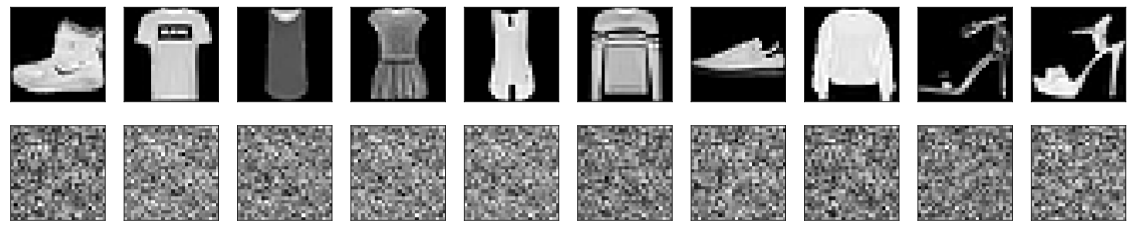

In [ ]:
#Visual of Decoded and original data
encoder_plot_mnist(X=MF_train_images_shaped,encoder=encoder_mnist,decoder=decoder_mnist)

Use Pretrained encoder with ANN

In [ ]:
#Transform inputs 
MF_train_transformed, MF_test_transformed=Dimension_reduction(Xtrain=MF_train_images_shaped,Xtest=MF_test_images_shaped,encoder=encoder_mnist)

In [ ]:
##Training classification model
model_MF=pretrained_model(x_train_transformed=MF_train_transformed,out=10)

In [ ]:
history_model3_MF=model_MF.fit(MF_train_transformed,MF_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500)

Epoch 1/500
960/960 - 2s - loss: 1.3071 - accuracy: 0.5541 - val_loss: 0.7616 - val_accuracy: 0.7372
Epoch 2/500
960/960 - 2s - loss: 0.6887 - accuracy: 0.7570 - val_loss: 0.6268 - val_accuracy: 0.7646
Epoch 3/500
960/960 - 2s - loss: 0.5937 - accuracy: 0.7910 - val_loss: 0.5559 - val_accuracy: 0.8067
Epoch 4/500
960/960 - 2s - loss: 0.5398 - accuracy: 0.8098 - val_loss: 0.5108 - val_accuracy: 0.8187
Epoch 5/500
960/960 - 2s - loss: 0.5039 - accuracy: 0.8226 - val_loss: 0.4842 - val_accuracy: 0.8284
Epoch 6/500
960/960 - 2s - loss: 0.4760 - accuracy: 0.8338 - val_loss: 0.4549 - val_accuracy: 0.8400
Epoch 7/500
960/960 - 2s - loss: 0.4567 - accuracy: 0.8372 - val_loss: 0.4722 - val_accuracy: 0.8259
Epoch 8/500
960/960 - 2s - loss: 0.4415 - accuracy: 0.8432 - val_loss: 0.4409 - val_accuracy: 0.8428
Epoch 9/500
960/960 - 2s - loss: 0.4289 - accuracy: 0.8469 - val_loss: 0.4336 - val_accuracy: 0.8457
Epoch 10/500
960/960 - 2s - loss: 0.4172 - accuracy: 0.8498 - val_loss: 0.4227 - val_accura

In [ ]:
history_model3_MF_es=model_MF.fit(MF_train_transformed,MF_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500,callbacks=[early_stopping])

Epoch 1/500
960/960 - 2s - loss: 1.5444e-04 - accuracy: 1.0000 - val_loss: 1.2357 - val_accuracy: 0.8742
Epoch 2/500
960/960 - 2s - loss: 1.5371e-04 - accuracy: 1.0000 - val_loss: 1.2376 - val_accuracy: 0.8746
Epoch 3/500
960/960 - 2s - loss: 1.5319e-04 - accuracy: 1.0000 - val_loss: 1.2381 - val_accuracy: 0.8743
Epoch 4/500
960/960 - 2s - loss: 1.5241e-04 - accuracy: 1.0000 - val_loss: 1.2372 - val_accuracy: 0.8742
Epoch 5/500
960/960 - 2s - loss: 1.5192e-04 - accuracy: 1.0000 - val_loss: 1.2385 - val_accuracy: 0.8743
Epoch 6/500
960/960 - 2s - loss: 1.5116e-04 - accuracy: 1.0000 - val_loss: 1.2399 - val_accuracy: 0.8742
Epoch 7/500
960/960 - 2s - loss: 1.5062e-04 - accuracy: 1.0000 - val_loss: 1.2392 - val_accuracy: 0.8745
Epoch 8/500
960/960 - 2s - loss: 1.5020e-04 - accuracy: 1.0000 - val_loss: 1.2399 - val_accuracy: 0.8739
Epoch 9/500
960/960 - 2s - loss: 1.4933e-04 - accuracy: 1.0000 - val_loss: 1.2415 - val_accuracy: 0.8745
Epoch 10/500
960/960 - 2s - loss: 1.4859e-04 - accuracy

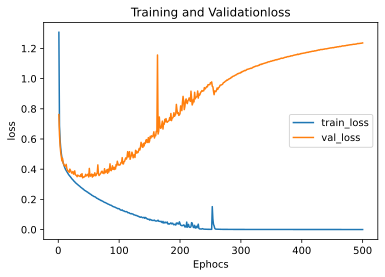

In [ ]:
plot_metric(history_model3_MF,'loss')

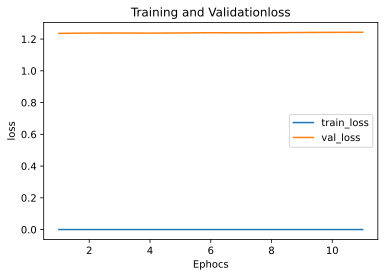

In [ ]:
plot_metric(history_model3_MF_es,'loss')

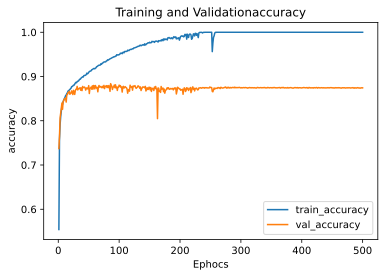

In [ ]:
plot_metric(history_model3_MF,'accuracy')

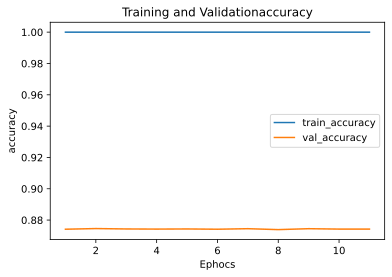

In [ ]:
plot_metric(history_model3_MF_es,'accuracy')

In [ ]:
_, MF_train_model3= history_model3_MF_es.model.evaluate(MF_train_transformed, MF_train_labels, verbose=0)
_, MF_test_model3 = history_model3_MF_es.model.evaluate(MF_test_transformed, to_categorical(MF_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (MF_train_model3, MF_test_model3))

Train: 0.975, Test: 0.873


### **Training Model on MNIST Digital Data**

Autoencoder training

In [ ]:
autoencoder_mnist, encoder_mnist, decoder_mnist=encoder(ndim=784)

In [ ]:
history_AE_mnist=autoencoder_mnist.fit(mnist_train_images_shape, mnist_train_images_shape,
                epochs=500,
                batch_size=50,
                shuffle=True,
                validation_split=0.20)

Epoch 1/500
960/960 [==============================] - 8s 9ms/step - loss: 0.6742 - val_loss: 0.6426
Epoch 2/500
960/960 [==============================] - 8s 8ms/step - loss: 0.5925 - val_loss: 0.5320
Epoch 3/500
960/960 [==============================] - 8s 9ms/step - loss: 0.4644 - val_loss: 0.4036
Epoch 4/500
960/960 [==============================] - 8s 9ms/step - loss: 0.3651 - val_loss: 0.3350
Epoch 5/500
960/960 [==============================] - 8s 9ms/step - loss: 0.3202 - val_loss: 0.3067
Epoch 6/500
960/960 [==============================] - 8s 8ms/step - loss: 0.3010 - val_loss: 0.2935
Epoch 7/500
960/960 [==============================] - 8s 9ms/step - loss: 0.2912 - val_loss: 0.2860
Epoch 8/500
960/960 [==============================] - 8s 9ms/step - loss: 0.2852 - val_loss: 0.2811
Epoch 9/500
960/960 [==============================] - 8s 9ms/step - loss: 0.2810 - val_loss: 0.2775
Epoch 10/500
960/960 [==============================] - 8s 9ms/step - loss: 0.2778 - val_lo

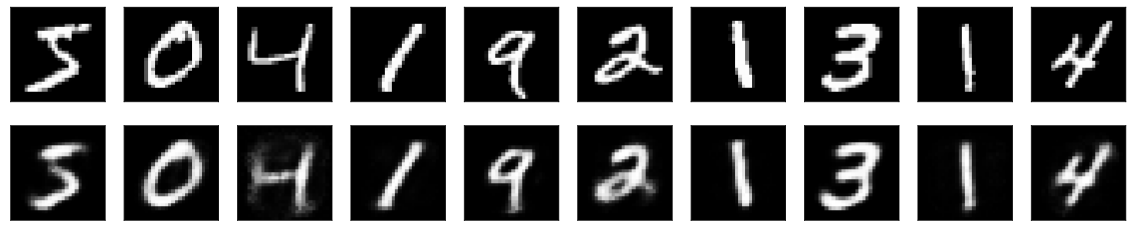

In [ ]:
encoder_plot_mnist(X=mnist_train_images_shape,encoder=encoder_mnist,decoder=decoder_mnist)

Using Pretrained Encoder

In [ ]:
mnist_train_transformed, mnist_test_transformed=Dimension_reduction(Xtrain=mnist_train_images_shape,Xtest=mnist_test_images_shape,encoder=encoder_mnist)

In [ ]:
model_mnist=pretrained_model(x_train_transformed=mnist_train_transformed,out=10)

In [ ]:
history_model3_mnist=model_mnist.fit(mnist_train_transformed,mnist_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500)

Epoch 1/500
960/960 - 2s - loss: 0.5967 - accuracy: 0.8245 - val_loss: 0.2966 - val_accuracy: 0.9113
Epoch 2/500
960/960 - 2s - loss: 0.2816 - accuracy: 0.9160 - val_loss: 0.2397 - val_accuracy: 0.9247
Epoch 3/500
960/960 - 2s - loss: 0.2204 - accuracy: 0.9337 - val_loss: 0.1834 - val_accuracy: 0.9449
Epoch 4/500
960/960 - 2s - loss: 0.1850 - accuracy: 0.9438 - val_loss: 0.1659 - val_accuracy: 0.9510
Epoch 5/500
960/960 - 2s - loss: 0.1635 - accuracy: 0.9512 - val_loss: 0.1545 - val_accuracy: 0.9548
Epoch 6/500
960/960 - 2s - loss: 0.1469 - accuracy: 0.9561 - val_loss: 0.1445 - val_accuracy: 0.9538
Epoch 7/500
960/960 - 2s - loss: 0.1333 - accuracy: 0.9593 - val_loss: 0.1219 - val_accuracy: 0.9628
Epoch 8/500
960/960 - 2s - loss: 0.1220 - accuracy: 0.9630 - val_loss: 0.1264 - val_accuracy: 0.9596
Epoch 9/500
960/960 - 2s - loss: 0.1140 - accuracy: 0.9657 - val_loss: 0.1327 - val_accuracy: 0.9607
Epoch 10/500
960/960 - 2s - loss: 0.1044 - accuracy: 0.9682 - val_loss: 0.1100 - val_accura

In [ ]:
history_model3_mnist_es=model_mnist.fit(mnist_train_transformed,mnist_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500,callbacks=[early_stopping])

Epoch 1/500
960/960 - 2s - loss: 4.7262e-05 - accuracy: 1.0000 - val_loss: 0.1429 - val_accuracy: 0.9808
Epoch 2/500
960/960 - 2s - loss: 4.7096e-05 - accuracy: 1.0000 - val_loss: 0.1431 - val_accuracy: 0.9808
Epoch 3/500
960/960 - 2s - loss: 4.6976e-05 - accuracy: 1.0000 - val_loss: 0.1433 - val_accuracy: 0.9807
Epoch 4/500
960/960 - 2s - loss: 4.6842e-05 - accuracy: 1.0000 - val_loss: 0.1430 - val_accuracy: 0.9808
Epoch 5/500
960/960 - 2s - loss: 4.6663e-05 - accuracy: 1.0000 - val_loss: 0.1430 - val_accuracy: 0.9807
Epoch 6/500
960/960 - 2s - loss: 4.6627e-05 - accuracy: 1.0000 - val_loss: 0.1433 - val_accuracy: 0.9808
Epoch 7/500
960/960 - 2s - loss: 4.6372e-05 - accuracy: 1.0000 - val_loss: 0.1430 - val_accuracy: 0.9807
Epoch 8/500
960/960 - 2s - loss: 4.6233e-05 - accuracy: 1.0000 - val_loss: 0.1431 - val_accuracy: 0.9808
Epoch 9/500
960/960 - 2s - loss: 4.6274e-05 - accuracy: 1.0000 - val_loss: 0.1433 - val_accuracy: 0.9808
Epoch 10/500
960/960 - 2s - loss: 4.6114e-05 - accuracy

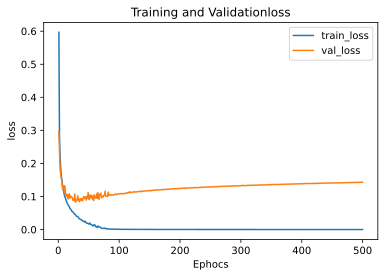

In [ ]:
plot_metric(history_model3_mnist,'loss')

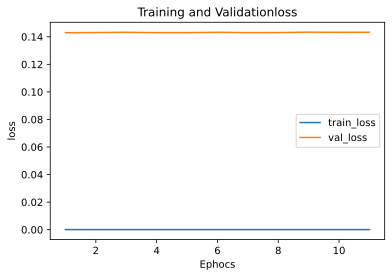

In [ ]:
plot_metric(history_model3_mnist_es,'loss')

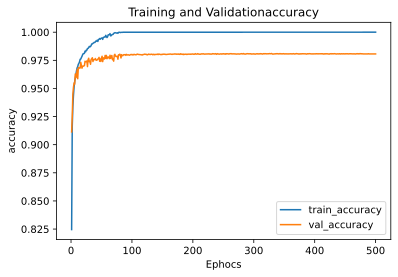

In [ ]:
plot_metric(history_model3_mnist,'accuracy')

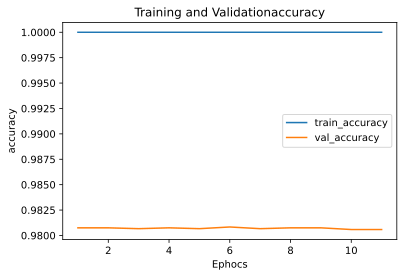

In [ ]:
plot_metric(history_model3_mnist_es,'accuracy')

In [ ]:
_, mnist_train_model3= history_model3_mnist_es.model.evaluate(mnist_train_transformed, mnist_train_labels, verbose=0)
_, mnist_test_model3 = history_model3_mnist_es.model.evaluate(mnist_test_transformed, to_categorical(mnist_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (mnist_train_model3, mnist_test_model3))

Train: 0.996, Test: 0.980


###**Training Model on CIFAR10 Data**

Autoencoder training

In [ ]:
autoencoder_CIFAR, encoder_CIFAR, decoder_CIFAR=encoder(ndim=3072)

In [ ]:
history_AE_CIFAR10=autoencoder_CIFAR.fit(CF10_train_images_shape, CF10_train_images_shape,
                epochs=500,
                batch_size=50,
                shuffle=True,
                validation_split=0.20)

Epoch 1/500
800/800 [==============================] - 24s 30ms/step - loss: 0.6968 - val_loss: 0.6947
Epoch 2/500
800/800 [==============================] - 23s 29ms/step - loss: 0.6940 - val_loss: 0.6935
Epoch 3/500
800/800 [==============================] - 23s 29ms/step - loss: 0.6933 - val_loss: 0.6931
Epoch 4/500
800/800 [==============================] - 23s 29ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 5/500
800/800 [==============================] - 23s 29ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 6/500
800/800 [==============================] - 23s 29ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 7/500
800/800 [==============================] - 24s 29ms/step - loss: 0.6924 - val_loss: 0.6923
Epoch 8/500
800/800 [==============================] - 23s 29ms/step - loss: 0.6923 - val_loss: 0.6922
Epoch 9/500
800/800 [==============================] - 23s 29ms/step - loss: 0.6921 - val_loss: 0.6920
Epoch 10/500
800/800 [==============================] - 23s 29ms/step - l

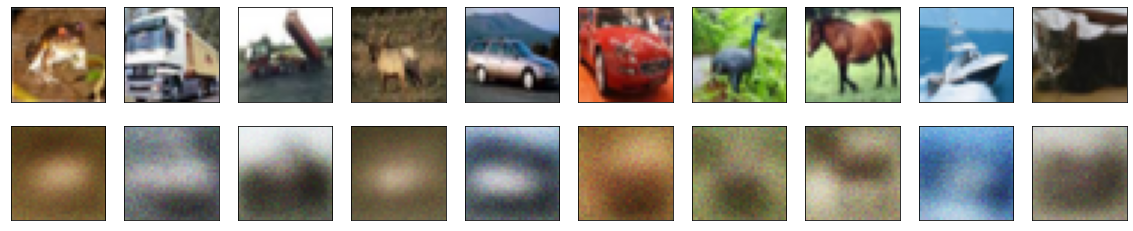

In [ ]:
encoder_plot_cifar(X=CF10_train_images_shape,encoder=encoder_CIFAR,decoder=decoder_CIFAR)

Using Pretrained Encoder

In [ ]:
CF10_train_transformed, CF10_test_transformed=Dimension_reduction(Xtrain=CF10_train_images_shape,Xtest=CF10_test_images_shape,encoder=encoder_CIFAR)

In [ ]:
model_CIFAR10=pretrained_model(x_train_transformed=CF10_train_transformed,out=10)

In [ ]:
history_model3_CF10=model_CIFAR10.fit(CF10_train_transformed,CF10_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=100)

Epoch 1/100
800/800 - 2s - loss: 1.9872 - accuracy: 0.2770 - val_loss: 1.8805 - val_accuracy: 0.3191
Epoch 2/100
800/800 - 2s - loss: 1.8352 - accuracy: 0.3329 - val_loss: 1.8211 - val_accuracy: 0.3470
Epoch 3/100
800/800 - 1s - loss: 1.7812 - accuracy: 0.3556 - val_loss: 1.7931 - val_accuracy: 0.3543
Epoch 4/100
800/800 - 2s - loss: 1.7477 - accuracy: 0.3686 - val_loss: 1.7736 - val_accuracy: 0.3640
Epoch 5/100
800/800 - 1s - loss: 1.7180 - accuracy: 0.3801 - val_loss: 1.7418 - val_accuracy: 0.3734
Epoch 6/100
800/800 - 1s - loss: 1.6983 - accuracy: 0.3890 - val_loss: 1.7050 - val_accuracy: 0.3853
Epoch 7/100
800/800 - 2s - loss: 1.6814 - accuracy: 0.3940 - val_loss: 1.7150 - val_accuracy: 0.3832
Epoch 8/100
800/800 - 2s - loss: 1.6663 - accuracy: 0.4014 - val_loss: 1.6700 - val_accuracy: 0.3980
Epoch 9/100
800/800 - 2s - loss: 1.6518 - accuracy: 0.4072 - val_loss: 1.7272 - val_accuracy: 0.3820
Epoch 10/100
800/800 - 2s - loss: 1.6370 - accuracy: 0.4107 - val_loss: 1.6728 - val_accura

In [ ]:
history_model3_CF10_es=model_CIFAR10.fit(CF10_train_transformed,CF10_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=100,callbacks=[early_stopping])

Epoch 1/100
800/800 - 2s - loss: 1.2330 - accuracy: 0.5595 - val_loss: 1.5713 - val_accuracy: 0.4605
Epoch 2/100
800/800 - 2s - loss: 1.2288 - accuracy: 0.5581 - val_loss: 1.5424 - val_accuracy: 0.4674
Epoch 3/100
800/800 - 2s - loss: 1.2263 - accuracy: 0.5591 - val_loss: 1.5797 - val_accuracy: 0.4576
Epoch 4/100
800/800 - 2s - loss: 1.2241 - accuracy: 0.5606 - val_loss: 1.5635 - val_accuracy: 0.4652
Epoch 5/100
800/800 - 2s - loss: 1.2212 - accuracy: 0.5616 - val_loss: 1.5564 - val_accuracy: 0.4724
Epoch 6/100
800/800 - 2s - loss: 1.2167 - accuracy: 0.5617 - val_loss: 1.5464 - val_accuracy: 0.4704
Epoch 7/100
800/800 - 2s - loss: 1.2135 - accuracy: 0.5659 - val_loss: 1.5680 - val_accuracy: 0.4617
Epoch 8/100
800/800 - 2s - loss: 1.2150 - accuracy: 0.5648 - val_loss: 1.5795 - val_accuracy: 0.4658
Epoch 9/100
800/800 - 2s - loss: 1.2113 - accuracy: 0.5661 - val_loss: 1.5599 - val_accuracy: 0.4606
Epoch 10/100
800/800 - 2s - loss: 1.2101 - accuracy: 0.5660 - val_loss: 1.5484 - val_accura

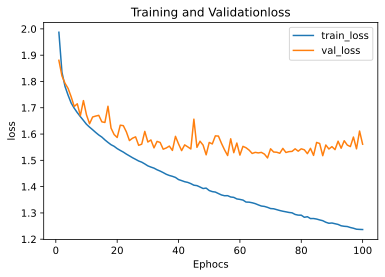

In [ ]:
plot_metric(history_model3_CF10,'loss')

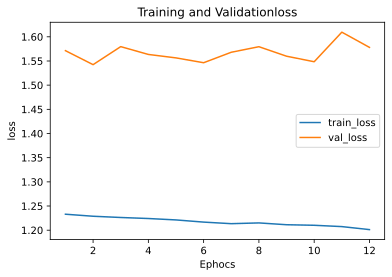

In [ ]:
plot_metric(history_model3_CF10_es,'loss')

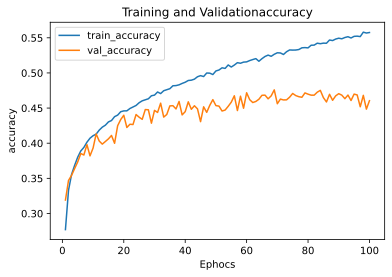

In [ ]:
plot_metric(history_model3_CF10,'accuracy')

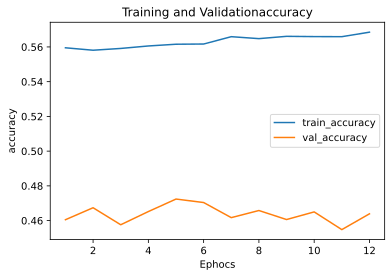

In [ ]:
plot_metric(history_model3_CF10_es,'accuracy')

In [ ]:
_, CF10_train_model3= history_model3_CF10_es.model.evaluate(CF10_train_transformed, CF10_train_labels, verbose=0)
_, CF10_test_model3 = history_model3_CF10_es.model.evaluate(CF10_test_transformed, to_categorical(CF10_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (CF10_train_model3, CF10_test_model3))

Train: 0.552, Test: 0.476


### **Training Model on CIFAR100 Data**

Autoencoder training

In [ ]:
autoencoder_CIFAR, encoder_CIFAR, decoder_CIFAR=encoder(ndim=3072)

In [ ]:
history_AE_CIFAR100=autoencoder_CIFAR.fit(CF100_train_images_shape, CF100_train_images_shape,
                epochs=100,
                batch_size=50,
                shuffle=True,
                validation_split=0.20)

Epoch 1/100
800/800 [==============================] - 23s 29ms/step - loss: 0.6953 - val_loss: 0.6940
Epoch 2/100
800/800 [==============================] - 23s 29ms/step - loss: 0.6936 - val_loss: 0.6933
Epoch 3/100
800/800 [==============================] - 23s 29ms/step - loss: 0.6931 - val_loss: 0.6929
Epoch 4/100
800/800 [==============================] - 23s 29ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 5/100
800/800 [==============================] - 23s 29ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 6/100
800/800 [==============================] - 23s 29ms/step - loss: 0.6924 - val_loss: 0.6923
Epoch 7/100
800/800 [==============================] - 24s 30ms/step - loss: 0.6923 - val_loss: 0.6921
Epoch 8/100
800/800 [==============================] - 23s 29ms/step - loss: 0.6921 - val_loss: 0.6919
Epoch 9/100
800/800 [==============================] - 23s 29ms/step - loss: 0.6918 - val_loss: 0.6917
Epoch 10/100
800/800 [==============================] - 23s 29ms/step - l

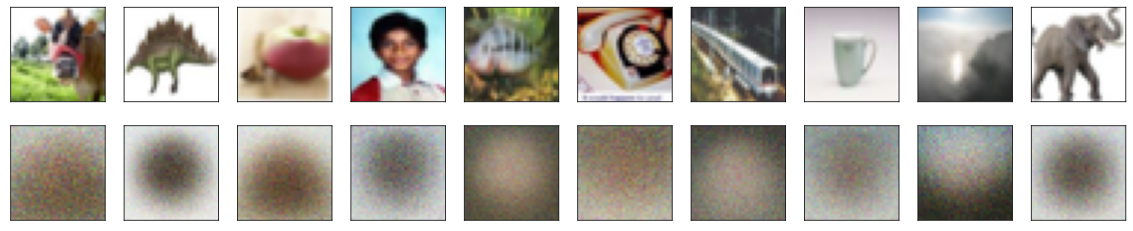

In [ ]:
encoder_plot_cifar(X=CF100_train_images_shape,encoder=encoder_CIFAR,decoder=decoder_CIFAR)

Using Pretrained Encoder

In [ ]:
CF100_train_transformed, CF100_test_transformed=Dimension_reduction(Xtrain=CF100_train_images_shape,Xtest=CF100_test_images_shape,encoder=encoder_CIFAR)

In [ ]:
model_CIFAR100=pretrained_model(x_train_transformed=CF100_train_transformed,out=100)

In [ ]:
history_model3_CF100=model_CIFAR100.fit(CF100_train_transformed,CF100_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=100)

Epoch 1/100
800/800 - 2s - loss: 4.2104 - accuracy: 0.0549 - val_loss: 4.1838 - val_accuracy: 0.0557
Epoch 2/100
800/800 - 2s - loss: 4.1281 - accuracy: 0.0633 - val_loss: 4.1015 - val_accuracy: 0.0676
Epoch 3/100
800/800 - 2s - loss: 4.0763 - accuracy: 0.0701 - val_loss: 4.0560 - val_accuracy: 0.0776
Epoch 4/100
800/800 - 2s - loss: 4.0370 - accuracy: 0.0776 - val_loss: 4.0399 - val_accuracy: 0.0838
Epoch 5/100
800/800 - 2s - loss: 4.0028 - accuracy: 0.0830 - val_loss: 4.0027 - val_accuracy: 0.0899
Epoch 6/100
800/800 - 2s - loss: 3.9753 - accuracy: 0.0890 - val_loss: 3.9856 - val_accuracy: 0.0890
Epoch 7/100
800/800 - 2s - loss: 3.9461 - accuracy: 0.0913 - val_loss: 3.9398 - val_accuracy: 0.0986
Epoch 8/100
800/800 - 2s - loss: 3.9177 - accuracy: 0.0963 - val_loss: 3.9540 - val_accuracy: 0.0933
Epoch 9/100
800/800 - 2s - loss: 3.8930 - accuracy: 0.1010 - val_loss: 3.8908 - val_accuracy: 0.1038
Epoch 10/100
800/800 - 2s - loss: 3.8650 - accuracy: 0.1073 - val_loss: 3.8618 - val_accura

In [ ]:
history_model3_CF100_es=model_CIFAR100.fit(CF100_train_transformed,CF100_train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=100,callbacks=[early_stopping])

Epoch 1/100
800/800 - 2s - loss: 3.1542 - accuracy: 0.2302 - val_loss: 3.4330 - val_accuracy: 0.1867
Epoch 2/100
800/800 - 2s - loss: 3.1479 - accuracy: 0.2316 - val_loss: 3.4324 - val_accuracy: 0.1878
Epoch 3/100
800/800 - 2s - loss: 3.1455 - accuracy: 0.2305 - val_loss: 3.4297 - val_accuracy: 0.1943
Epoch 4/100
800/800 - 2s - loss: 3.1406 - accuracy: 0.2342 - val_loss: 3.3956 - val_accuracy: 0.2018
Epoch 5/100
800/800 - 2s - loss: 3.1351 - accuracy: 0.2344 - val_loss: 3.4448 - val_accuracy: 0.1878
Epoch 6/100
800/800 - 2s - loss: 3.1351 - accuracy: 0.2320 - val_loss: 3.4093 - val_accuracy: 0.1916
Epoch 7/100
800/800 - 2s - loss: 3.1264 - accuracy: 0.2357 - val_loss: 3.3944 - val_accuracy: 0.1964
Epoch 8/100
800/800 - 2s - loss: 3.1248 - accuracy: 0.2343 - val_loss: 3.4420 - val_accuracy: 0.1921
Epoch 9/100
800/800 - 2s - loss: 3.1243 - accuracy: 0.2353 - val_loss: 3.4318 - val_accuracy: 0.1912
Epoch 10/100
800/800 - 2s - loss: 3.1175 - accuracy: 0.2369 - val_loss: 3.4240 - val_accura

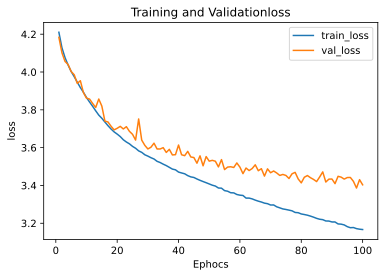

In [ ]:
plot_metric(history_model3_CF100,'loss')

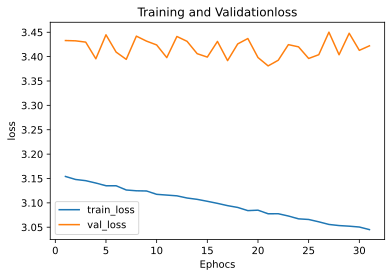

In [ ]:
plot_metric(history_model3_CF100_es,'loss')

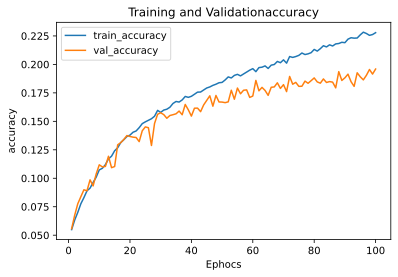

In [ ]:
plot_metric(history_model3_CF100,'accuracy')

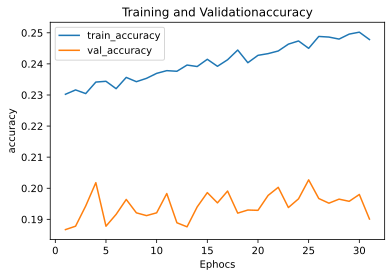

In [ ]:
plot_metric(history_model3_CF100_es,'accuracy')

In [ ]:
_, CF100_train_model3= history_model3_CF100_es.model.evaluate(CF100_train_transformed, CF100_train_labels, verbose=0)
_, CF100_test_model3 = history_model3_CF100_es.model.evaluate(CF100_test_transformed, to_categorical(CF100_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (CF100_train_model3, CF100_test_model3))

Train: 0.241, Test: 0.201


## MODEL 4: CNN

In [ ]:
## CNN model
def CNN_model(input_shape,out):

  model_cnn = models.Sequential()
  model_cnn.add(layers.Conv2D(55, (3, 3), strides=(1,1),padding='same',kernel_initializer='he_normal',activation='relu', input_shape=input_shape))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Conv2D(55, (3, 3),padding='same',activation='relu'))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Conv2D(55, (3, 3),padding='same',activation='relu'))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Flatten())
  model_cnn.add(Dense(200, activation='relu'))
  model_cnn.add(Dense(100, activation='relu'))
  model_cnn.add(Dense(50, activation='relu'))
  model_cnn.add(Dense(25, activation='relu'))
  model_cnn.add(Dense(out, activation='softmax'))

  opt = SGD()
  model_cnn.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  return model_cnn

In [ ]:
## CNN model
def CNN_model_mnist(out):

  model_cnn = models.Sequential()
  model_cnn.add(layers.Conv2D(55, (3, 3), strides=(1,1),padding='same',kernel_initializer='he_normal',activation='relu', input_shape=(28,28,1)))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Conv2D(55, (3, 3),padding='same',activation='relu'))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Conv2D(55, (3, 3),padding='same',activation='relu'))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Flatten())
  model_cnn.add(Dense(200, activation='relu'))
  model_cnn.add(Dense(100, activation='relu'))
  model_cnn.add(Dense(50, activation='relu'))
  model_cnn.add(Dense(25, activation='relu'))
  model_cnn.add(Dense(out, activation='softmax'))

  opt = SGD()
  model_cnn.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  return model_cnn

### Training model on MNIST Fashion

In [ ]:
trainX = MF_train_images.reshape((MF_train_images.shape[0], 28, 28, 1))
testX = MF_test_images.reshape((MF_test_images.shape[0], 28, 28, 1))

In [ ]:
model_mnist=CNN_model_mnist(out=10)

In [ ]:
history_cnn_MF = model_mnist.fit(trainX,MF_train_labels_cat, epochs=100, 
                    validation_split=0.20,batch_size=50,verbose=2)

Epoch 1/100
960/960 - 98s - loss: 0.9030 - accuracy: 0.6714 - val_loss: 0.5999 - val_accuracy: 0.7688
Epoch 2/100
960/960 - 98s - loss: 0.5180 - accuracy: 0.8067 - val_loss: 0.4547 - val_accuracy: 0.8382
Epoch 3/100
960/960 - 98s - loss: 0.4296 - accuracy: 0.8447 - val_loss: 0.4016 - val_accuracy: 0.8512
Epoch 4/100
960/960 - 98s - loss: 0.3792 - accuracy: 0.8622 - val_loss: 0.3636 - val_accuracy: 0.8648
Epoch 5/100
960/960 - 98s - loss: 0.3460 - accuracy: 0.8734 - val_loss: 0.3325 - val_accuracy: 0.8783
Epoch 6/100
960/960 - 102s - loss: 0.3252 - accuracy: 0.8816 - val_loss: 0.3362 - val_accuracy: 0.8790
Epoch 7/100
960/960 - 98s - loss: 0.3055 - accuracy: 0.8898 - val_loss: 0.3183 - val_accuracy: 0.8828
Epoch 8/100
960/960 - 98s - loss: 0.2918 - accuracy: 0.8946 - val_loss: 0.3154 - val_accuracy: 0.8841
Epoch 9/100
960/960 - 97s - loss: 0.2789 - accuracy: 0.8990 - val_loss: 0.2869 - val_accuracy: 0.8970
Epoch 10/100
960/960 - 98s - loss: 0.2686 - accuracy: 0.9025 - val_loss: 0.3071 -

In [ ]:
history_cnn_MF_es = model_mnist.fit(trainX,MF_train_labels_cat, epochs=100, 
                    validation_split=0.20,batch_size=50,verbose=2, callbacks=[early_stopping])

Epoch 1/100
960/960 - 100s - loss: 3.5567e-04 - accuracy: 1.0000 - val_loss: 0.6049 - val_accuracy: 0.9196
Epoch 2/100
960/960 - 100s - loss: 3.4014e-04 - accuracy: 1.0000 - val_loss: 0.6079 - val_accuracy: 0.9194
Epoch 3/100
960/960 - 100s - loss: 3.2697e-04 - accuracy: 1.0000 - val_loss: 0.6093 - val_accuracy: 0.9202
Epoch 4/100
960/960 - 103s - loss: 3.1401e-04 - accuracy: 1.0000 - val_loss: 0.6141 - val_accuracy: 0.9195
Epoch 5/100
960/960 - 99s - loss: 3.0080e-04 - accuracy: 1.0000 - val_loss: 0.6158 - val_accuracy: 0.9200
Epoch 6/100
960/960 - 99s - loss: 2.8941e-04 - accuracy: 1.0000 - val_loss: 0.6181 - val_accuracy: 0.9198
Epoch 7/100
960/960 - 100s - loss: 2.8036e-04 - accuracy: 1.0000 - val_loss: 0.6216 - val_accuracy: 0.9201
Epoch 8/100
960/960 - 99s - loss: 2.7010e-04 - accuracy: 1.0000 - val_loss: 0.6241 - val_accuracy: 0.9197
Epoch 9/100
960/960 - 99s - loss: 2.6330e-04 - accuracy: 1.0000 - val_loss: 0.6266 - val_accuracy: 0.9201
Epoch 10/100
960/960 - 101s - loss: 2.534

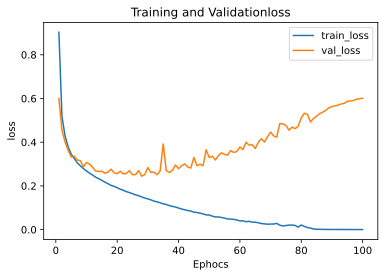

In [ ]:
plot_metric(history_cnn_MF,'loss')

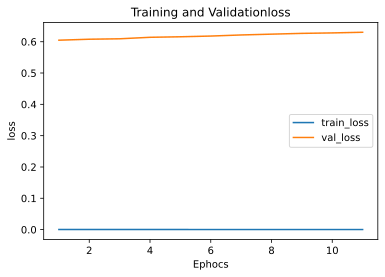

In [ ]:
plot_metric(history_cnn_MF_es,'loss')

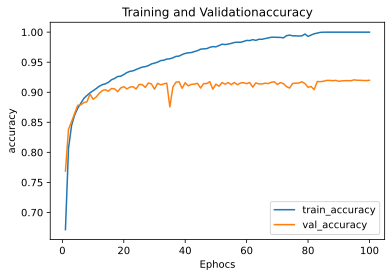

In [ ]:
plot_metric(history_cnn_MF,'accuracy')

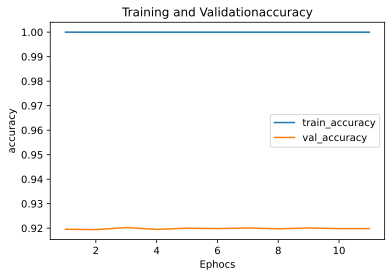

In [ ]:
plot_metric(history_cnn_MF_es,'accuracy')

In [ ]:
_, MF_train_model4= history_cnn_MF_es.model.evaluate(trainX, MF_train_labels_cat, verbose=0)
_, MF_test_model4 = history_cnn_MF_es.model.evaluate(testX, to_categorical(MF_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (MF_train_model4, MF_test_model4))

Train: 0.984, Test: 0.914


### Training model on MNIST

In [ ]:
trainX_mnist = mnist_train_images.reshape((mnist_train_images.shape[0], 28, 28, 1))
testX_mnist = mnist_test_images.reshape((mnist_test_images.shape[0], 28, 28, 1))

In [ ]:
model_mnist=CNN_model(input_shape=(28,28,1),out=10)

In [ ]:
history_cnn_mnist = model_mnist.fit(trainX_mnist,mnist_train_labels, epochs=100, 
                    validation_split=0.20,batch_size=50,verbose=2)

Epoch 1/100
960/960 - 98s - loss: 0.5405 - accuracy: 0.8339 - val_loss: 0.1372 - val_accuracy: 0.9587
Epoch 2/100
960/960 - 101s - loss: 0.1204 - accuracy: 0.9626 - val_loss: 0.0790 - val_accuracy: 0.9759
Epoch 3/100
960/960 - 98s - loss: 0.0837 - accuracy: 0.9740 - val_loss: 0.0873 - val_accuracy: 0.9739
Epoch 4/100
960/960 - 98s - loss: 0.0667 - accuracy: 0.9798 - val_loss: 0.0712 - val_accuracy: 0.9780
Epoch 5/100
960/960 - 97s - loss: 0.0565 - accuracy: 0.9829 - val_loss: 0.0540 - val_accuracy: 0.9827
Epoch 6/100
960/960 - 98s - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.0655 - val_accuracy: 0.9804
Epoch 7/100
960/960 - 98s - loss: 0.0429 - accuracy: 0.9868 - val_loss: 0.0441 - val_accuracy: 0.9868
Epoch 8/100
960/960 - 97s - loss: 0.0373 - accuracy: 0.9880 - val_loss: 0.0410 - val_accuracy: 0.9885
Epoch 9/100
960/960 - 102s - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0437 - val_accuracy: 0.9870
Epoch 10/100
960/960 - 98s - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0505 

In [ ]:
history_cnn_mnist_es = model_mnist.fit(trainX_mnist,mnist_train_labels, epochs=100, 
                    validation_split=0.20,batch_size=50,verbose=2, callbacks=[early_stopping])

Epoch 1/100
960/960 - 99s - loss: 8.5911e-05 - accuracy: 1.0000 - val_loss: 0.0491 - val_accuracy: 0.9908
Epoch 2/100
960/960 - 99s - loss: 8.6928e-05 - accuracy: 1.0000 - val_loss: 0.0492 - val_accuracy: 0.9908
Epoch 3/100
960/960 - 99s - loss: 8.3424e-05 - accuracy: 1.0000 - val_loss: 0.0496 - val_accuracy: 0.9908
Epoch 4/100
960/960 - 99s - loss: 8.2611e-05 - accuracy: 1.0000 - val_loss: 0.0493 - val_accuracy: 0.9908
Epoch 5/100
960/960 - 99s - loss: 8.1092e-05 - accuracy: 1.0000 - val_loss: 0.0495 - val_accuracy: 0.9909
Epoch 6/100
960/960 - 103s - loss: 7.9492e-05 - accuracy: 1.0000 - val_loss: 0.0496 - val_accuracy: 0.9909
Epoch 7/100
960/960 - 99s - loss: 7.8050e-05 - accuracy: 1.0000 - val_loss: 0.0496 - val_accuracy: 0.9911
Epoch 8/100
960/960 - 99s - loss: 7.7292e-05 - accuracy: 1.0000 - val_loss: 0.0499 - val_accuracy: 0.9908
Epoch 9/100
960/960 - 99s - loss: 7.6184e-05 - accuracy: 1.0000 - val_loss: 0.0500 - val_accuracy: 0.9910
Epoch 10/100
960/960 - 99s - loss: 7.5170e-05

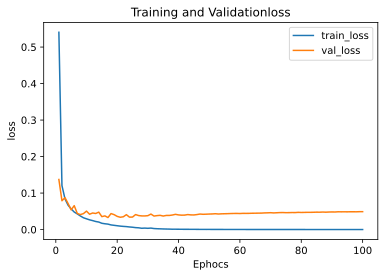

In [ ]:
plot_metric(history_cnn_mnist,'loss')

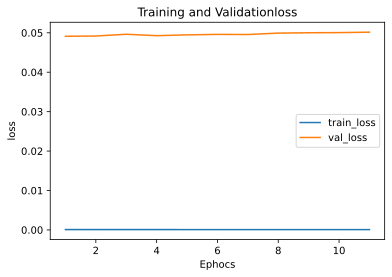

In [ ]:
plot_metric(history_cnn_mnist_es,'loss')

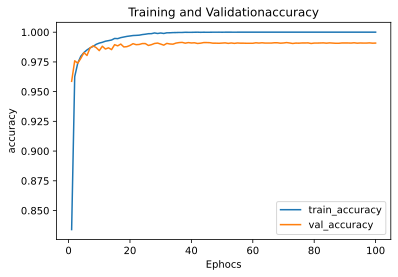

In [ ]:
plot_metric(history_cnn_mnist,'accuracy')

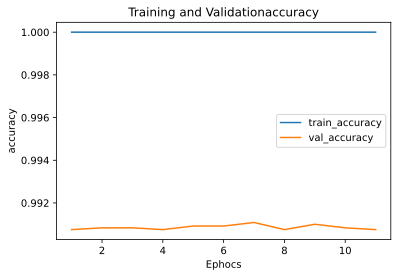

In [ ]:
plot_metric(history_cnn_mnist_es,'accuracy')

In [ ]:
_, mnist_train_model4= history_cnn_mnist_es.model.evaluate(trainX_mnist, mnist_train_labels, verbose=0)
_, mnist_test_model4 = history_cnn_mnist_es.model.evaluate(testX_mnist, to_categorical(mnist_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (mnist_train_model4, mnist_test_model4))

Train: 0.998, Test: 0.993


### Training model on CIFAR10

In [ ]:
model_CF10=CNN_model(input_shape=(32,32,3),out=10)

In [ ]:
history_cnn_CF10 = model_CF10.fit(CF10_train_images,CF10_train_labels_cat, epochs=100, 
                    validation_split=0.20,batch_size=50,verbose=2)

Epoch 1/100
800/800 - 108s - loss: 2.1707 - accuracy: 0.2072 - val_loss: 2.1603 - val_accuracy: 0.2403
Epoch 2/100
800/800 - 110s - loss: 1.8054 - accuracy: 0.3488 - val_loss: 1.7442 - val_accuracy: 0.3589
Epoch 3/100
800/800 - 110s - loss: 1.5744 - accuracy: 0.4263 - val_loss: 1.6100 - val_accuracy: 0.4151
Epoch 4/100
800/800 - 111s - loss: 1.4497 - accuracy: 0.4766 - val_loss: 1.4999 - val_accuracy: 0.4597
Epoch 5/100
800/800 - 111s - loss: 1.3522 - accuracy: 0.5095 - val_loss: 1.3827 - val_accuracy: 0.5040
Epoch 6/100
800/800 - 111s - loss: 1.2652 - accuracy: 0.5455 - val_loss: 1.2420 - val_accuracy: 0.5592
Epoch 7/100
800/800 - 111s - loss: 1.1880 - accuracy: 0.5748 - val_loss: 1.2006 - val_accuracy: 0.5711
Epoch 8/100
800/800 - 111s - loss: 1.1286 - accuracy: 0.5967 - val_loss: 1.1996 - val_accuracy: 0.5693
Epoch 9/100
800/800 - 112s - loss: 1.0666 - accuracy: 0.6196 - val_loss: 1.0915 - val_accuracy: 0.6141
Epoch 10/100
800/800 - 113s - loss: 1.0177 - accuracy: 0.6410 - val_loss:

In [ ]:
history_cnn_CF10_es = model_CF10.fit(CF10_train_images,CF10_train_labels_cat, epochs=100, 
                    validation_split=0.20,batch_size=50,verbose=2, callbacks=[early_stopping])

Epoch 1/100
800/800 - 111s - loss: 1.7647e-04 - accuracy: 1.0000 - val_loss: 2.9556 - val_accuracy: 0.7207
Epoch 2/100
800/800 - 111s - loss: 1.7133e-04 - accuracy: 1.0000 - val_loss: 2.9618 - val_accuracy: 0.7208
Epoch 3/100
800/800 - 111s - loss: 1.6857e-04 - accuracy: 1.0000 - val_loss: 2.9668 - val_accuracy: 0.7210
Epoch 4/100
800/800 - 110s - loss: 1.6487e-04 - accuracy: 1.0000 - val_loss: 2.9722 - val_accuracy: 0.7207
Epoch 5/100
800/800 - 110s - loss: 1.6113e-04 - accuracy: 1.0000 - val_loss: 2.9810 - val_accuracy: 0.7208
Epoch 6/100
800/800 - 112s - loss: 1.5749e-04 - accuracy: 1.0000 - val_loss: 2.9873 - val_accuracy: 0.7204
Epoch 7/100
800/800 - 111s - loss: 1.5453e-04 - accuracy: 1.0000 - val_loss: 2.9919 - val_accuracy: 0.7210
Epoch 8/100
800/800 - 114s - loss: 1.5129e-04 - accuracy: 1.0000 - val_loss: 2.9990 - val_accuracy: 0.7203
Epoch 9/100
800/800 - 110s - loss: 1.4866e-04 - accuracy: 1.0000 - val_loss: 3.0049 - val_accuracy: 0.7208
Epoch 10/100
800/800 - 110s - loss: 1

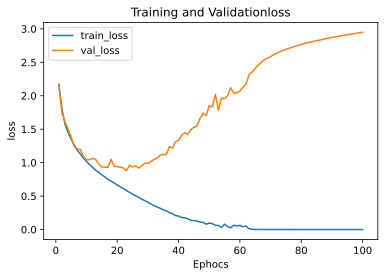

In [ ]:
plot_metric(history_cnn_CF10,'loss')

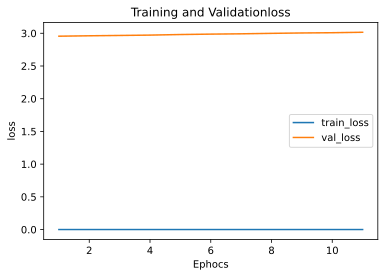

In [ ]:
plot_metric(history_cnn_CF10_es,'loss')

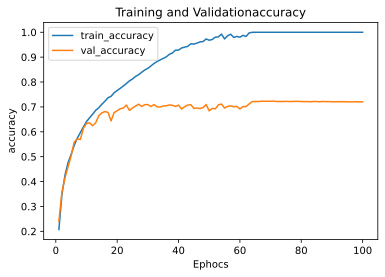

In [ ]:
plot_metric(history_cnn_CF10,'accuracy')

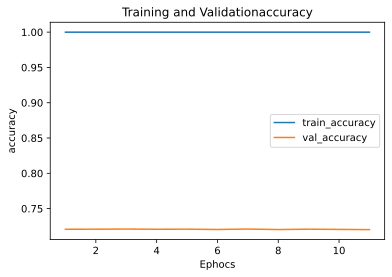

In [ ]:
plot_metric(history_cnn_CF10_es,'accuracy')

In [ ]:
_, CF10_train_model4= history_cnn_CF10_es.model.evaluate(CF10_train_images, CF10_train_labels_cat, verbose=0)
_, CF10_test_model4 = history_cnn_CF10_es.model.evaluate(CF10_test_images, to_categorical(CF10_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (CF10_train_model4, CF10_test_model4))

Train: 0.944, Test: 0.717


### Training model on CIFAR100

In [ ]:
model_CF100=CNN_model(input_shape=(32,32,3),out=100)

In [ ]:
history_cnn_CF100 = model_CF100.fit(CF100_train_images,CF100_train_labels_cat, epochs=100, 
                    validation_split=0.20,batch_size=50,verbose=2)

Epoch 1/100
800/800 - 113s - loss: 4.5926 - accuracy: 0.0163 - val_loss: 4.5730 - val_accuracy: 0.0231
Epoch 2/100
800/800 - 110s - loss: 4.5123 - accuracy: 0.0243 - val_loss: 4.4281 - val_accuracy: 0.0310
Epoch 3/100
800/800 - 112s - loss: 4.3382 - accuracy: 0.0391 - val_loss: 4.2688 - val_accuracy: 0.0427
Epoch 4/100
800/800 - 112s - loss: 4.1777 - accuracy: 0.0565 - val_loss: 4.1057 - val_accuracy: 0.0715
Epoch 5/100
800/800 - 111s - loss: 4.0420 - accuracy: 0.0786 - val_loss: 3.9831 - val_accuracy: 0.0901
Epoch 6/100
800/800 - 112s - loss: 3.9113 - accuracy: 0.0997 - val_loss: 3.9214 - val_accuracy: 0.1039
Epoch 7/100
800/800 - 111s - loss: 3.7833 - accuracy: 0.1226 - val_loss: 3.7550 - val_accuracy: 0.1305
Epoch 8/100
800/800 - 111s - loss: 3.6619 - accuracy: 0.1424 - val_loss: 3.6515 - val_accuracy: 0.1438
Epoch 9/100
800/800 - 112s - loss: 3.5554 - accuracy: 0.1553 - val_loss: 3.5084 - val_accuracy: 0.1679
Epoch 10/100
800/800 - 110s - loss: 3.4596 - accuracy: 0.1710 - val_loss:

In [ ]:
history_cnn_CF100_es = model_CF100.fit(CF100_train_images,CF100_train_labels_cat, epochs=100, 
                    validation_split=0.20,batch_size=50,verbose=2, callbacks=[early_stopping])

Epoch 1/100
800/800 - 112s - loss: 0.3718 - accuracy: 0.8791 - val_loss: 7.2106 - val_accuracy: 0.3024
Epoch 2/100
800/800 - 110s - loss: 0.3618 - accuracy: 0.8809 - val_loss: 7.1343 - val_accuracy: 0.3011
Epoch 3/100
800/800 - 110s - loss: 0.3127 - accuracy: 0.8974 - val_loss: 7.4266 - val_accuracy: 0.3087
Epoch 4/100
800/800 - 111s - loss: 0.3384 - accuracy: 0.8881 - val_loss: 7.3690 - val_accuracy: 0.3053
Epoch 5/100
800/800 - 110s - loss: 0.2962 - accuracy: 0.9030 - val_loss: 7.8284 - val_accuracy: 0.2941
Epoch 6/100
800/800 - 111s - loss: 0.2806 - accuracy: 0.9075 - val_loss: 7.9721 - val_accuracy: 0.2997
Epoch 7/100
800/800 - 111s - loss: 0.2362 - accuracy: 0.9219 - val_loss: 8.1184 - val_accuracy: 0.2945
Epoch 8/100
800/800 - 110s - loss: 0.3220 - accuracy: 0.8939 - val_loss: 7.6958 - val_accuracy: 0.2941
Epoch 9/100
800/800 - 113s - loss: 0.3479 - accuracy: 0.8873 - val_loss: 8.0240 - val_accuracy: 0.3029
Epoch 10/100
800/800 - 110s - loss: 0.3069 - accuracy: 0.8989 - val_loss:

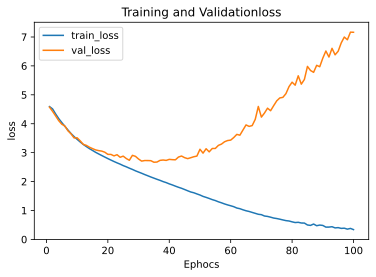

In [ ]:
plot_metric(history_cnn_CF100,'loss')

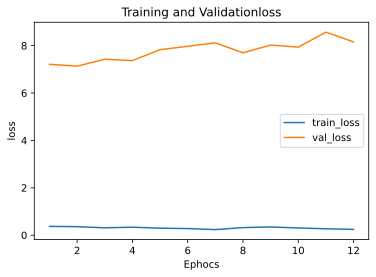

In [ ]:
plot_metric(history_cnn_CF100_es,'loss')

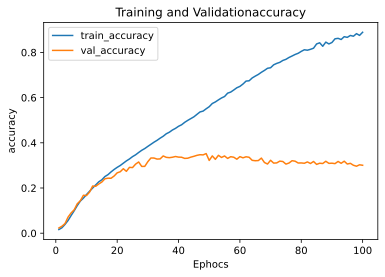

In [ ]:
plot_metric(history_cnn_CF100,'accuracy')

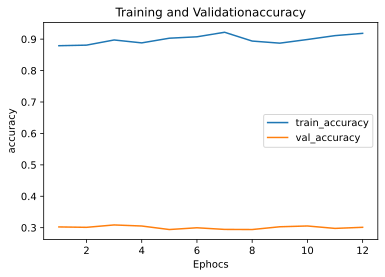

In [ ]:
plot_metric(history_cnn_CF100_es,'accuracy')

In [ ]:
_, CF100_train_model4= history_cnn_CF100_es.model.evaluate(CF100_train_images, CF100_train_labels_cat, verbose=0)
_, CF100_test_model4 = history_cnn_CF100_es.model.evaluate(CF100_test_images, to_categorical(CF100_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (CF100_train_model4, CF100_test_model4))

Train: 0.785, Test: 0.307


## Model 5

Mnist fashion dataset adding L1 regularization~ model 1

### **Training model on MNIST FASHION**

In [ ]:
from keras.layers import BatchNormalization
def simpleNN_L1(ndim,out):
  model=Sequential()
  model.add(BatchNormalization())
  model.add(Dense(out, activation='softmax',kernel_initializer='he_uniform',input_dim=ndim))


  #compiling the model:
  opt = SGD()
  model.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )

  return model


In [ ]:
simple_model_mnist_L1=simpleNN_L1(ndim=784,out=10)

In [ ]:
#Training model without early stopping:

history_MF= simple_model_mnist_L1.fit(MF_train_images_shaped,to_categorical(MF_train_labels),validation_split=0.20,batch_size=50,verbose=2,epochs=100)

Epoch 1/100
960/960 - 1s - loss: 0.6512 - accuracy: 0.7749 - val_loss: 0.5196 - val_accuracy: 0.8177
Epoch 2/100
960/960 - 1s - loss: 0.5062 - accuracy: 0.8255 - val_loss: 0.4778 - val_accuracy: 0.8351
Epoch 3/100
960/960 - 1s - loss: 0.4783 - accuracy: 0.8359 - val_loss: 0.4626 - val_accuracy: 0.8405
Epoch 4/100
960/960 - 1s - loss: 0.4633 - accuracy: 0.8416 - val_loss: 0.4511 - val_accuracy: 0.8462
Epoch 5/100
960/960 - 1s - loss: 0.4526 - accuracy: 0.8450 - val_loss: 0.4442 - val_accuracy: 0.8493
Epoch 6/100
960/960 - 1s - loss: 0.4451 - accuracy: 0.8473 - val_loss: 0.4424 - val_accuracy: 0.8493
Epoch 7/100
960/960 - 1s - loss: 0.4378 - accuracy: 0.8509 - val_loss: 0.4380 - val_accuracy: 0.8503
Epoch 8/100
960/960 - 1s - loss: 0.4349 - accuracy: 0.8505 - val_loss: 0.4370 - val_accuracy: 0.8477
Epoch 9/100
960/960 - 1s - loss: 0.4309 - accuracy: 0.8516 - val_loss: 0.4358 - val_accuracy: 0.8518
Epoch 10/100
960/960 - 1s - loss: 0.4283 - accuracy: 0.8515 - val_loss: 0.4321 - val_accura

In [ ]:
#Training model to include early stopping with patience of 10

history_MF_es_L1= simple_model_mnist_L1.fit(MF_train_images_shaped,MF_train_labels_cat,validation_split=0.20,batch_size=50,verbose=2,epochs=100,callbacks=[early_stopping])

NameError: ignored

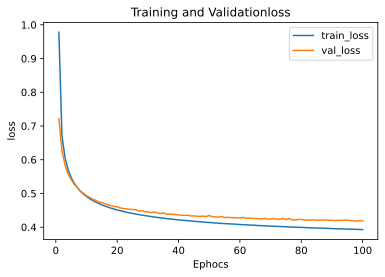

In [ ]:
plot_metric(history_MF,'loss')

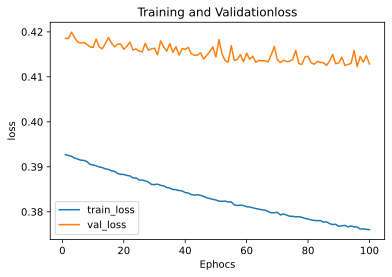

In [ ]:
plot_metric(history_MF_es_L1,'loss')

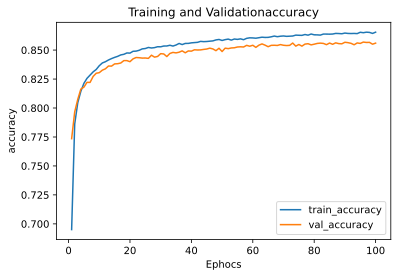

In [ ]:
plot_metric(history_MF,'accuracy')

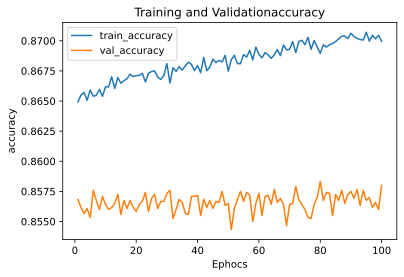

In [ ]:
plot_metric(history_MF_es_L1,'accuracy')

In [ ]:
#Evaluating the model.

_, MF_train_acc = history_MF.model.evaluate(MF_train_images_shaped, MF_train_labels_cat, verbose=0)
_, MF_test_acc = history_MF.model.evaluate(MF_test_images_shaped, to_categorical(MF_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (MF_train_acc, MF_test_acc))

Train: 0.868, Test: 0.839


### Training CIFAR10 




### Training model on CIFAR10

In [ ]:
## L1
def CNN_model(input_shape,out):

  model_cnn = models.Sequential()
  model_cnn.add(layers.Conv2D(55, (3, 3), strides=(1,1),padding='same',kernel_initializer='he_normal',activation='relu', input_shape=input_shape))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Conv2D(55, (3, 3),padding='same',kernel_regularizer=tf.keras.regularizers.l1(l=0.01),activation='relu'))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Conv2D(55, (3, 3),padding='same',activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l=0.01)))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Flatten())
  model_cnn.add(Dense(200, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l=0.01)))
  model_cnn.add(Dense(100, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l=0.01)))
  model_cnn.add(Dense(50, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l=0.01)))
  model_cnn.add(Dense(25, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l=0.01)))
  model_cnn.add(Dense(out, activation='softmax'))

  opt = SGD()
  model_cnn.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  return model_cnn

In [ ]:
model_CF10_L1=CNN_model(input_shape=(32,32,3),out=10)

In [ ]:
history_cnn_CF10_L1 = model_CF10_L1.fit(CF10_train_images,CF10_train_labels_cat, epochs=100, 
                    validation_split=0.20,batch_size=50,verbose=2)

Epoch 1/100
800/800 - 109s - loss: 41.9946 - accuracy: 0.1369 - val_loss: 7.8744 - val_accuracy: 0.0980
Epoch 2/100
800/800 - 109s - loss: 4.6145 - accuracy: 0.0970 - val_loss: 2.9841 - val_accuracy: 0.0952
Epoch 3/100
800/800 - 109s - loss: 2.6359 - accuracy: 0.0999 - val_loss: 2.4725 - val_accuracy: 0.0977
Epoch 4/100
800/800 - 110s - loss: 2.4380 - accuracy: 0.0992 - val_loss: 2.4314 - val_accuracy: 0.0952
Epoch 5/100
800/800 - 109s - loss: 2.4310 - accuracy: 0.1007 - val_loss: 2.4313 - val_accuracy: 0.0952
Epoch 6/100
800/800 - 109s - loss: 2.4310 - accuracy: 0.1012 - val_loss: 2.4313 - val_accuracy: 0.0952
Epoch 7/100
800/800 - 109s - loss: 2.4310 - accuracy: 0.0982 - val_loss: 2.4313 - val_accuracy: 0.0952
Epoch 8/100
800/800 - 109s - loss: 2.4310 - accuracy: 0.1001 - val_loss: 2.4313 - val_accuracy: 0.0952
Epoch 9/100
800/800 - 109s - loss: 2.4310 - accuracy: 0.0991 - val_loss: 2.4313 - val_accuracy: 0.0952
Epoch 10/100
800/800 - 110s - loss: 2.4310 - accuracy: 0.1006 - val_loss

In [ ]:
history_cnn_CF10_es = model_CF10.fit(CF10_train_images,CF10_train_labels_cat, epochs=100, 
                    validation_split=0.20,batch_size=50,verbose=2, callbacks=[early_stopping])

In [ ]:
plot_metric(history_cnn_CF10,'loss')

In [ ]:
plot_metric(history_cnn_CF10_es,'loss')

In [ ]:
plot_metric(history_cnn_CF10,'accuracy')

In [ ]:
plot_metric(history_cnn_CF10_es,'accuracy')

In [ ]:
_, CF10_train_model4= history_cnn_CF10_es.model.evaluate(CF10_train_images, CF10_train_labels_cat, verbose=0)
_, CF10_test_model4 = history_cnn_CF10_es.model.evaluate(CF10_test_images, to_categorical(CF10_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (CF10_train_model4, CF10_test_model4))

## Model 5

### MINST DIGITAL DATA~ Best performing model= model 4

In [ ]:
## Adding regularization L1
def CNN_model(input_shape,out):

  model_cnn = models.Sequential()
  model_cnn.add(layers.Conv2D(55, (3, 3), strides=(1,1),padding='same',kernel_initializer='he_normal',activation='relu',input_shape=input_shape))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Conv2D(55, (3, 3),padding='same',activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l=0.01)))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Conv2D(55, (3, 3),padding='same',activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l=0.01)))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Flatten())
  model_cnn.add(Dense(200, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l=0.01)))
  model_cnn.add(Dense(100, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l=0.01)))
  model_cnn.add(Dense(50, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l=0.01)))
  model_cnn.add(Dense(25, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l=0.01)))
  model_cnn.add(Dense(out, activation='softmax'))

  opt = SGD()
  model_cnn.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  return model_cnn

### Training model on MNIST

In [ ]:
trainX_mnist = mnist_train_images.reshape((mnist_train_images.shape[0], 28, 28, 1))
testX_mnist = mnist_test_images.reshape((mnist_test_images.shape[0], 28, 28, 1))

In [ ]:
model_mnist=CNN_model(input_shape=(28,28,1),out=10)

In [ ]:
history_cnn_mnist = model_mnist.fit(trainX_mnist,mnist_train_labels, epochs=100, 
                    validation_split=0.20,batch_size=50,verbose=2)

Epoch 1/100
960/960 - 96s - loss: 34.2407 - accuracy: 0.5371 - val_loss: 6.4265 - val_accuracy: 0.7296
Epoch 2/100
960/960 - 100s - loss: 3.5249 - accuracy: 0.7185 - val_loss: 2.0577 - val_accuracy: 0.7892
Epoch 3/100
960/960 - 98s - loss: 1.7733 - accuracy: 0.7747 - val_loss: 1.4754 - val_accuracy: 0.8253
Epoch 4/100
960/960 - 98s - loss: 1.4327 - accuracy: 0.8068 - val_loss: 1.2941 - val_accuracy: 0.8316
Epoch 5/100
960/960 - 98s - loss: 1.2627 - accuracy: 0.8389 - val_loss: 1.1398 - val_accuracy: 0.8749
Epoch 6/100
960/960 - 98s - loss: 1.1607 - accuracy: 0.8537 - val_loss: 1.0583 - val_accuracy: 0.8791
Epoch 7/100
960/960 - 98s - loss: 1.0924 - accuracy: 0.8624 - val_loss: 1.0092 - val_accuracy: 0.8838
Epoch 8/100
960/960 - 98s - loss: 1.0415 - accuracy: 0.8695 - val_loss: 0.9581 - val_accuracy: 0.8922
Epoch 9/100
960/960 - 98s - loss: 1.0077 - accuracy: 0.8736 - val_loss: 0.9349 - val_accuracy: 0.8972
Epoch 10/100
960/960 - 98s - loss: 0.9753 - accuracy: 0.8780 - val_loss: 0.9451 

In [ ]:
_, mnist_train_model4= history_cnn_mnist.model.evaluate(trainX_mnist, mnist_train_labels, verbose=0)
_, mnist_test_model4 = history_cnn_mnist.model.evaluate(testX_mnist, to_categorical(mnist_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (mnist_train_model4, mnist_test_model4))

Train: 0.922, Test: 0.928


In [ ]:
## Adding regularization L2
def CNN_model_L2(input_shape,out):

  model_cnn = models.Sequential()
  model_cnn.add(layers.Conv2D(55, (3, 3), strides=(1,1),padding='same',kernel_initializer='he_normal',activation='relu',input_shape=input_shape))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Conv2D(55, (3, 3),padding='same',activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Conv2D(55, (3, 3),padding='same',activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
  model_cnn.add(layers.MaxPooling2D((2, 2)))
  model_cnn.add(layers.Flatten())
  model_cnn.add(Dense(200, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
  model_cnn.add(Dense(100, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
  model_cnn.add(Dense(50, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
  model_cnn.add(Dense(25, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
  model_cnn.add(Dense(out, activation='softmax'))

  opt = SGD()
  model_cnn.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  return model_cnn

In [ ]:
model_mnist=CNN_model_L2(input_shape=(28,28,1),out=10)

In [ ]:
history_cnn_mnist = model_mnist.fit(trainX_mnist,mnist_train_labels, epochs=100, 
                    validation_split=0.20,batch_size=50,verbose=2)

Epoch 1/100
960/960 - 96s - loss: 5.9125 - accuracy: 0.8198 - val_loss: 4.6071 - val_accuracy: 0.9543
Epoch 2/100
960/960 - 96s - loss: 3.8935 - accuracy: 0.9545 - val_loss: 3.2919 - val_accuracy: 0.9449
Epoch 3/100
960/960 - 97s - loss: 2.7672 - accuracy: 0.9623 - val_loss: 2.3563 - val_accuracy: 0.9615
Epoch 4/100
960/960 - 96s - loss: 2.0064 - accuracy: 0.9663 - val_loss: 1.7354 - val_accuracy: 0.9625
Epoch 5/100
960/960 - 97s - loss: 1.4882 - accuracy: 0.9683 - val_loss: 1.2971 - val_accuracy: 0.9651
Epoch 6/100
960/960 - 97s - loss: 1.1351 - accuracy: 0.9698 - val_loss: 1.0205 - val_accuracy: 0.9617
Epoch 7/100
960/960 - 97s - loss: 0.8937 - accuracy: 0.9696 - val_loss: 0.7931 - val_accuracy: 0.9743
Epoch 8/100
960/960 - 97s - loss: 0.7268 - accuracy: 0.9705 - val_loss: 0.6453 - val_accuracy: 0.9767
Epoch 9/100
960/960 - 98s - loss: 0.6130 - accuracy: 0.9710 - val_loss: 0.5579 - val_accuracy: 0.9736
Epoch 10/100
960/960 - 97s - loss: 0.5325 - accuracy: 0.9714 - val_loss: 0.4957 - 

In [ ]:
_, mnist_train_model4= history_cnn_mnist.model.evaluate(trainX_mnist, mnist_train_labels, verbose=0)
_, mnist_test_model4 = history_cnn_mnist.model.evaluate(testX_mnist, to_categorical(mnist_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (mnist_train_model4, mnist_test_model4))

Train: 0.979, Test: 0.979


In [ ]:
_, mnist_train_model4= history_cnn_mnist.model.evaluate(trainX_mnist, mnist_train_labels, verbose=0)
_, mnist_test_model4 = history_cnn_mnist.model.evaluate(testX_mnist, to_categorical(mnist_test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (mnist_train_model4, mnist_test_model4))

Train: 0.922, Test: 0.928
